In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install colorthief

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Processing TalgaVideo.mp4 ---
✅ Saved 32 frames for Talga1.
✅ CSV saved for Talga1: Talga1_colors.csv
🎨 Dominant Colour Counts for Talga1:
Other: 350 frames
Blue: 263 frames
Green: 45 frames


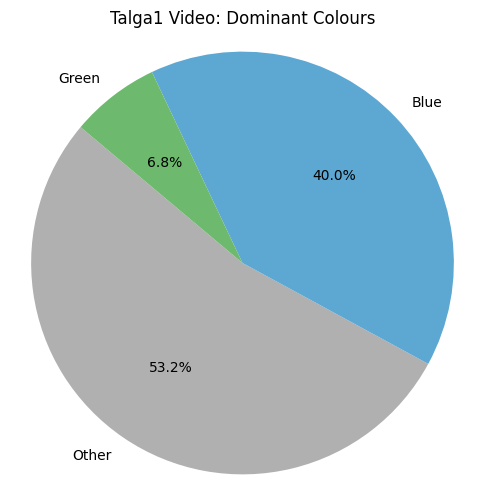

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Pie chart saved and downloaded: Talga1_piechart.png


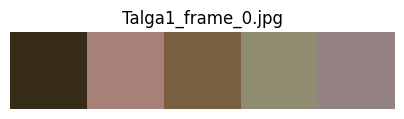

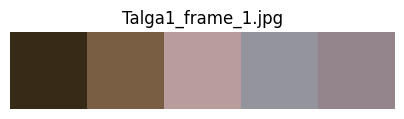

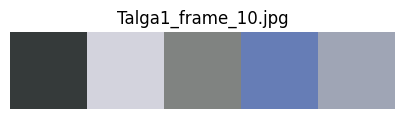

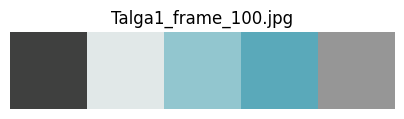

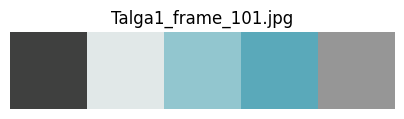

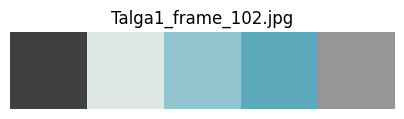

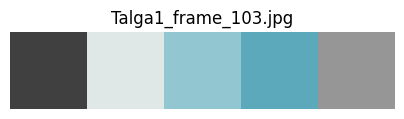

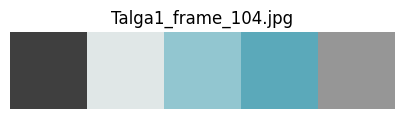

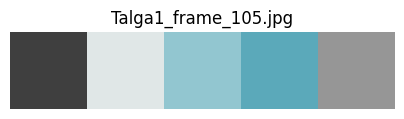

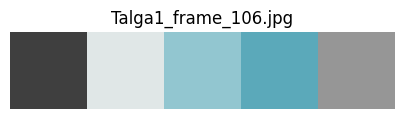

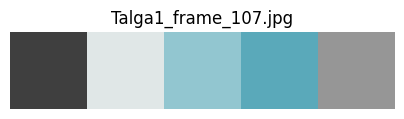

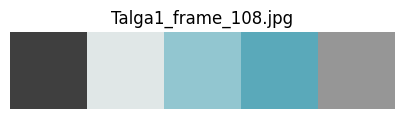

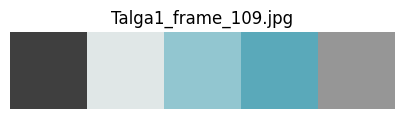

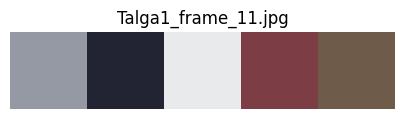

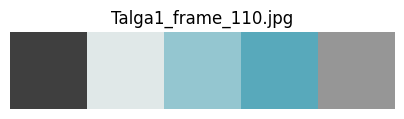

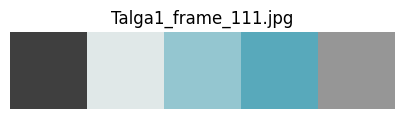

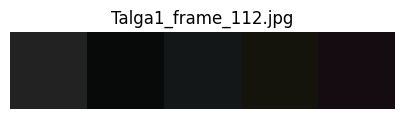

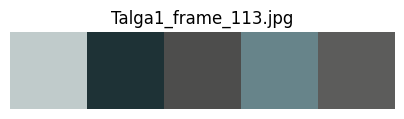

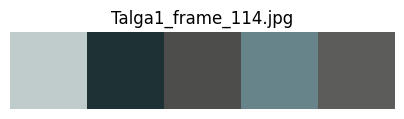

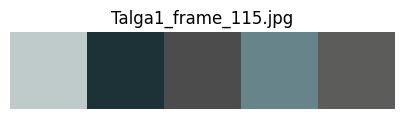

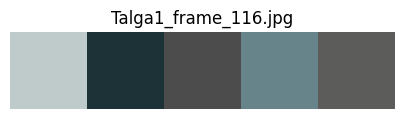

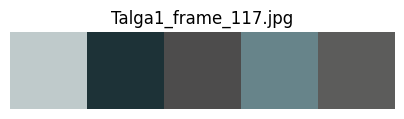

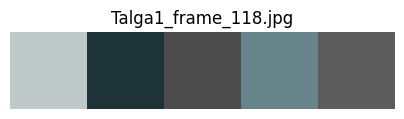

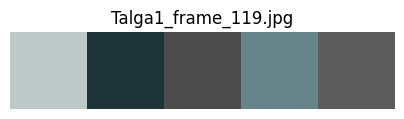

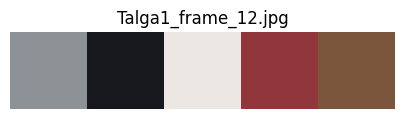

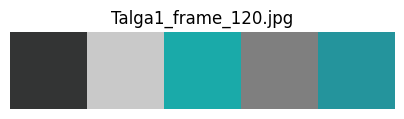

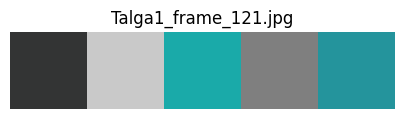

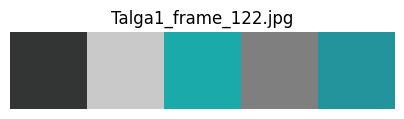

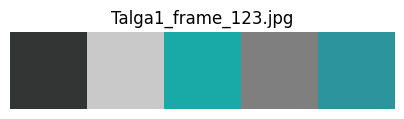

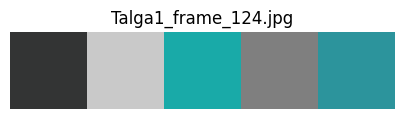

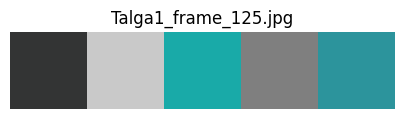

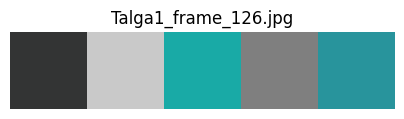

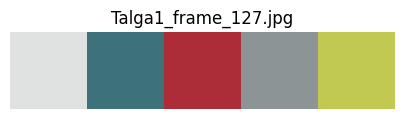

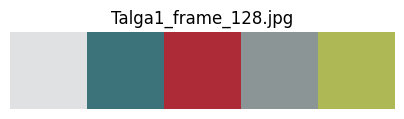

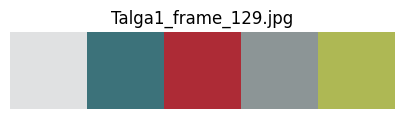

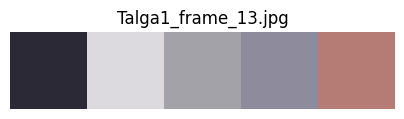

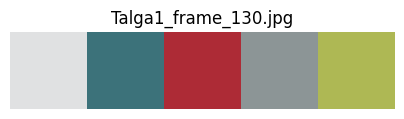

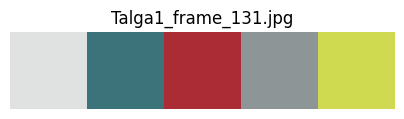

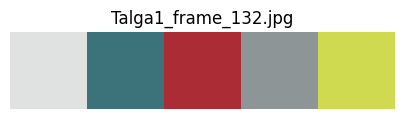

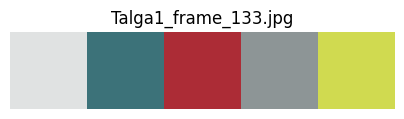

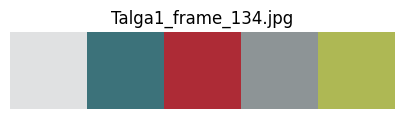

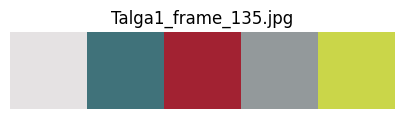

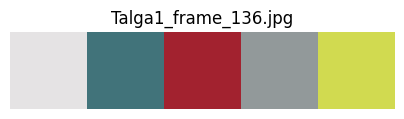

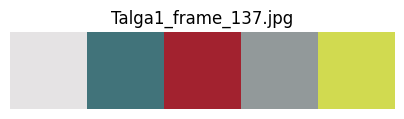

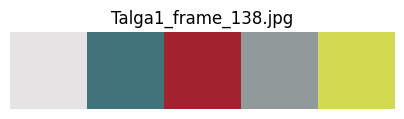

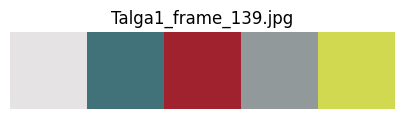

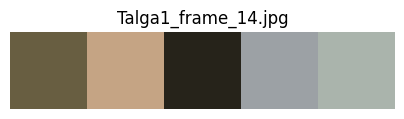

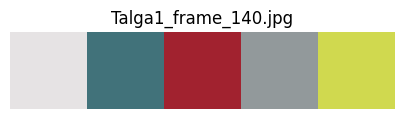

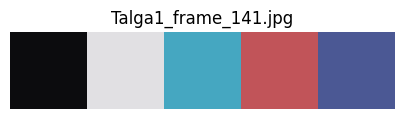

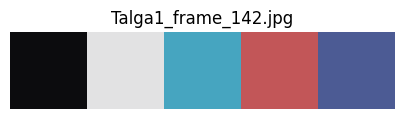

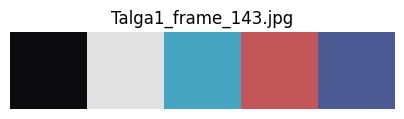

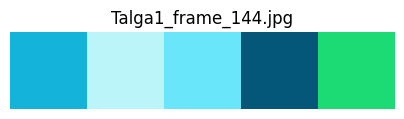

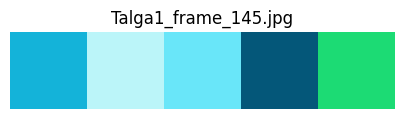

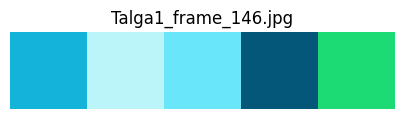

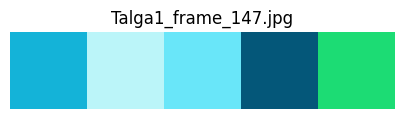

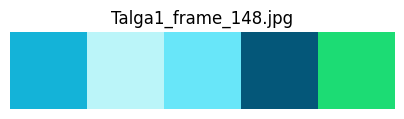

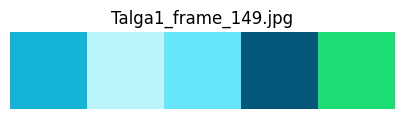

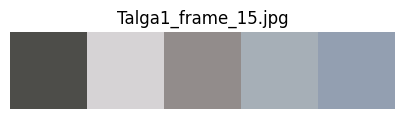

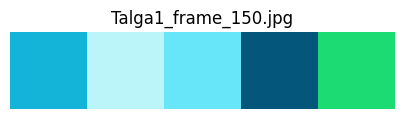

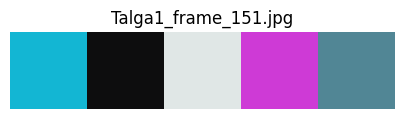

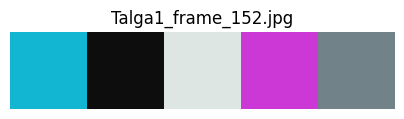

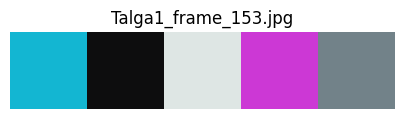

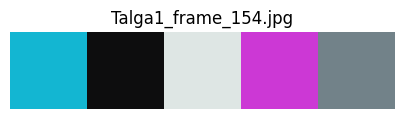

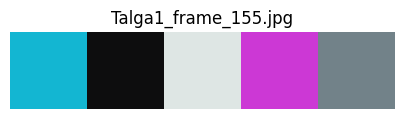

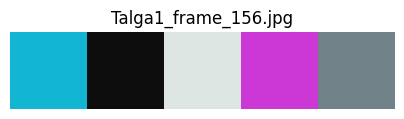

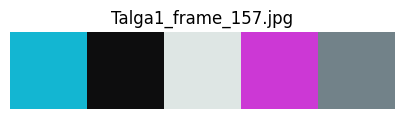

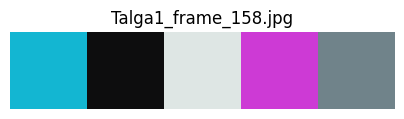

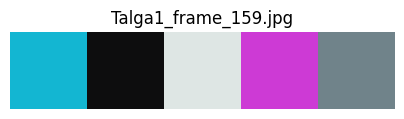

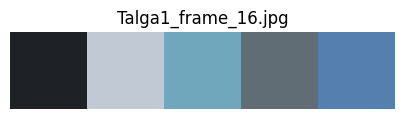

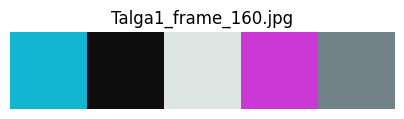

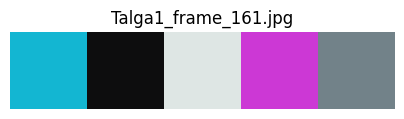

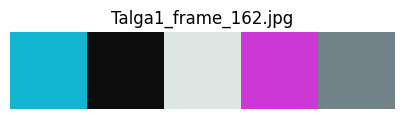

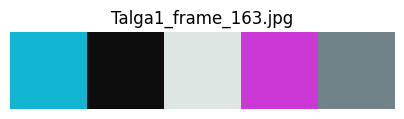

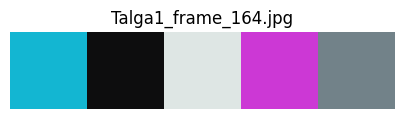

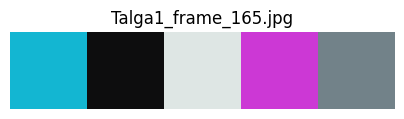

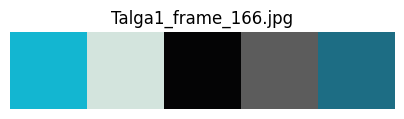

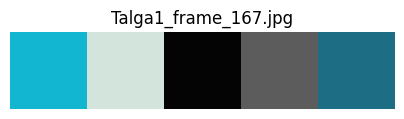

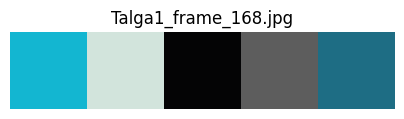

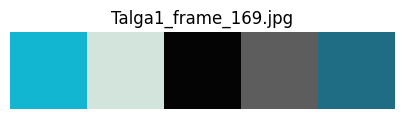

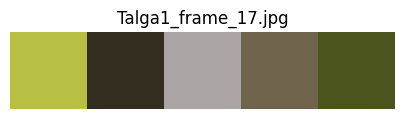

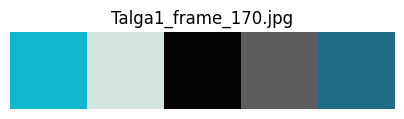

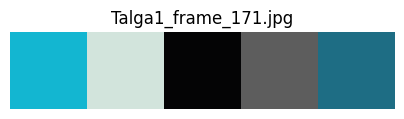

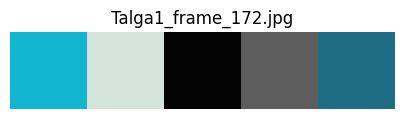

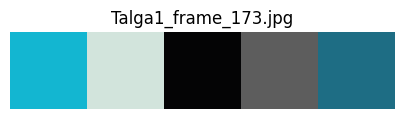

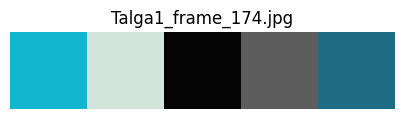

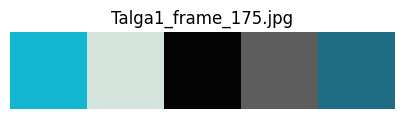

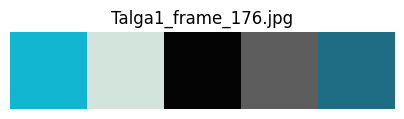

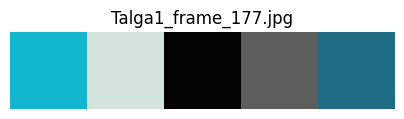

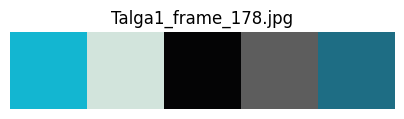

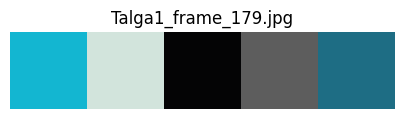

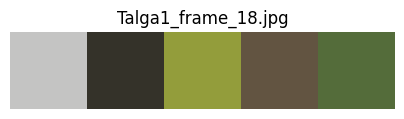

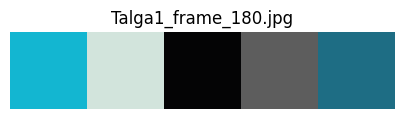

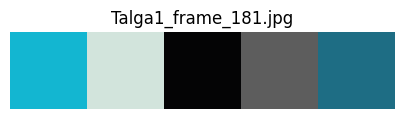

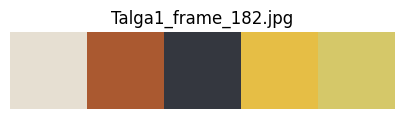

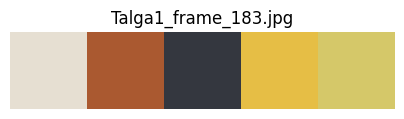

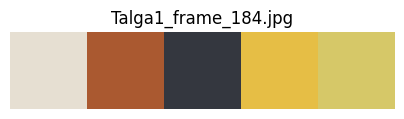

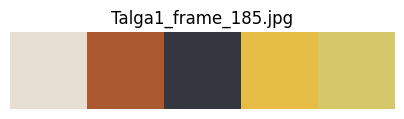

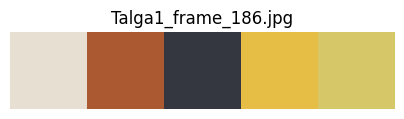

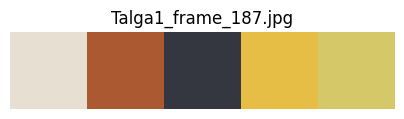

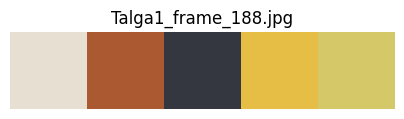

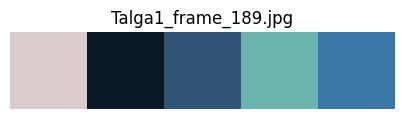

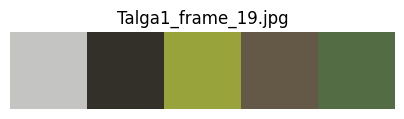

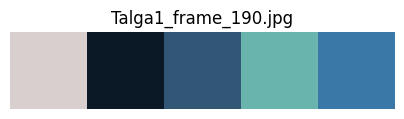

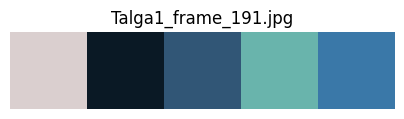

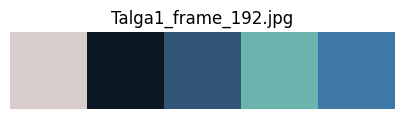

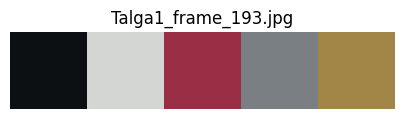

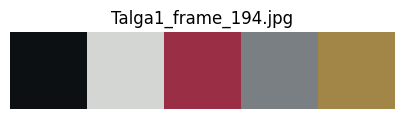

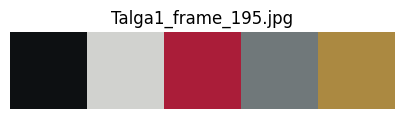

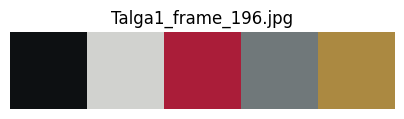

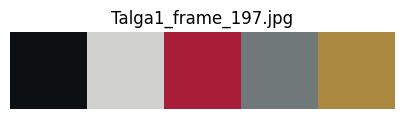

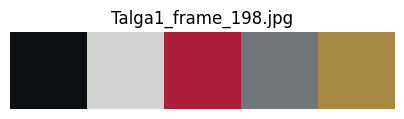

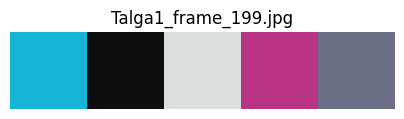

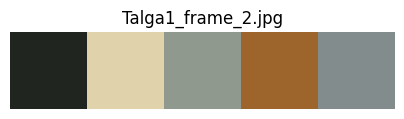

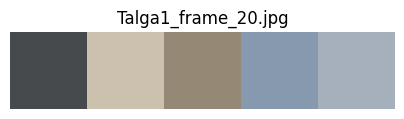

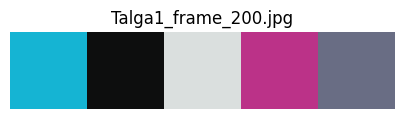

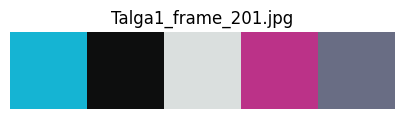

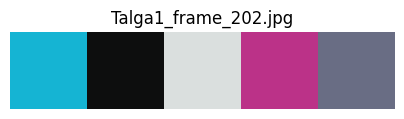

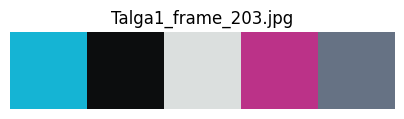

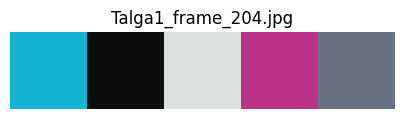

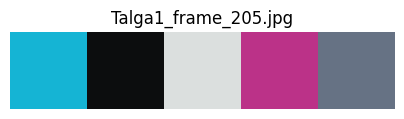

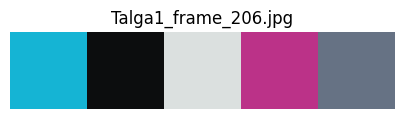

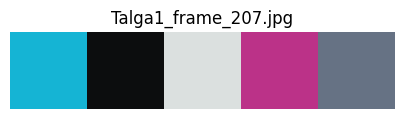

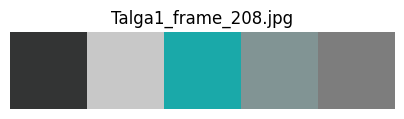

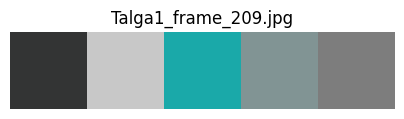

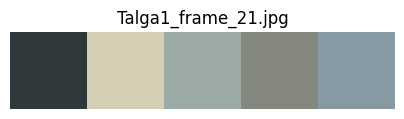

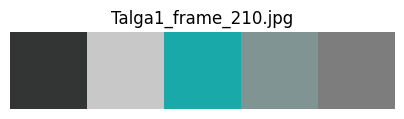

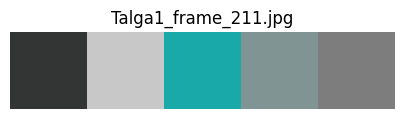

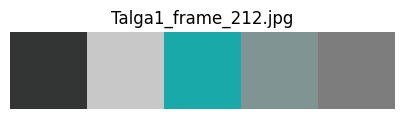

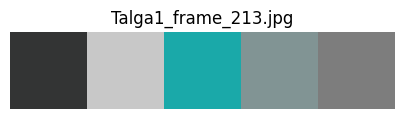

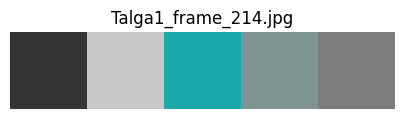

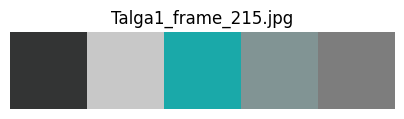

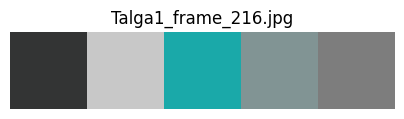

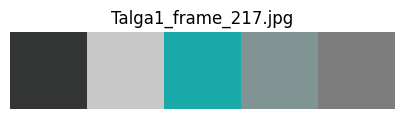

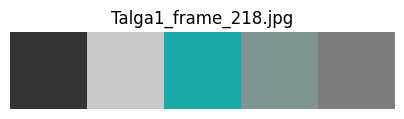

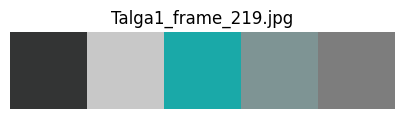

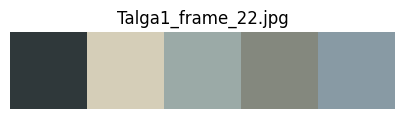

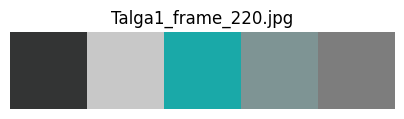

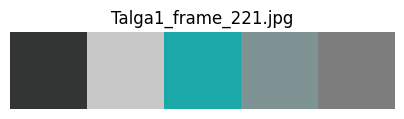

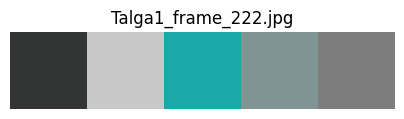

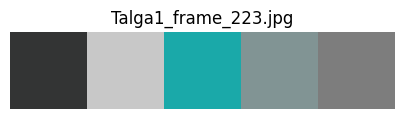

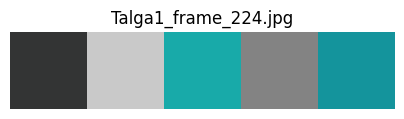

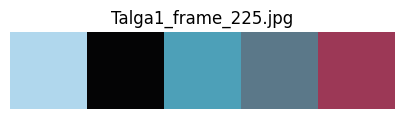

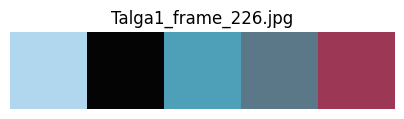

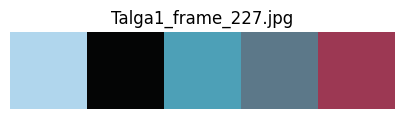

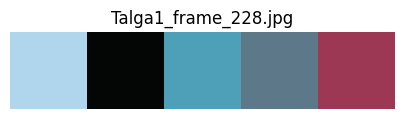

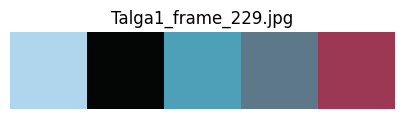

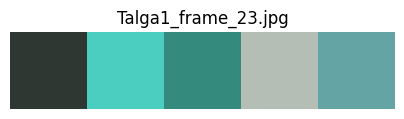

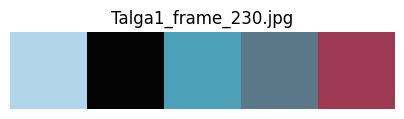

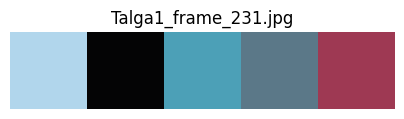

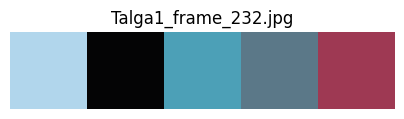

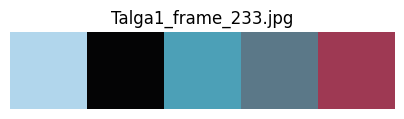

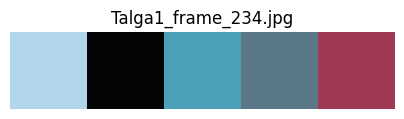

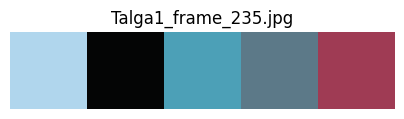

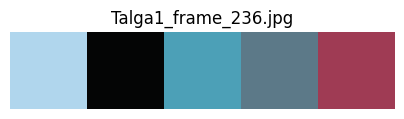

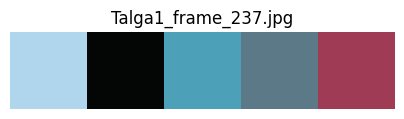

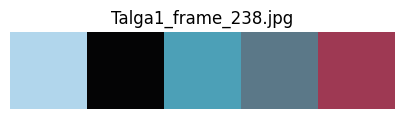

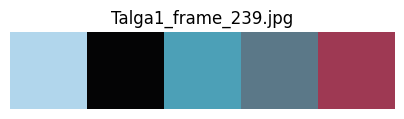

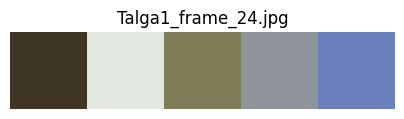

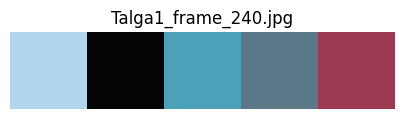

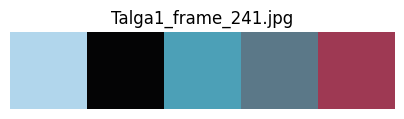

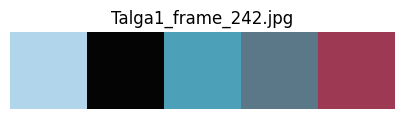

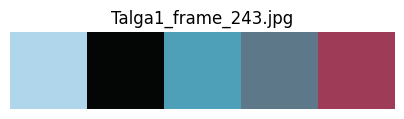

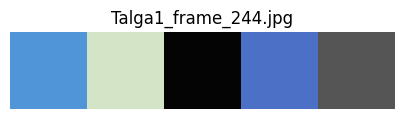

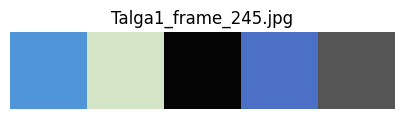

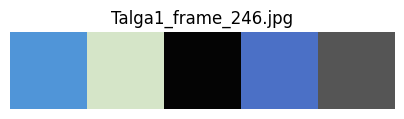

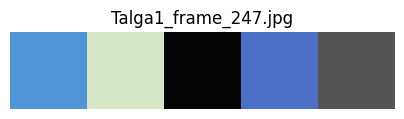

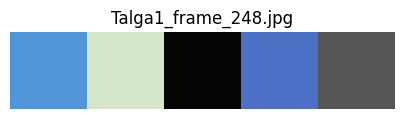

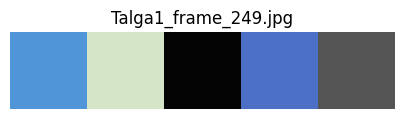

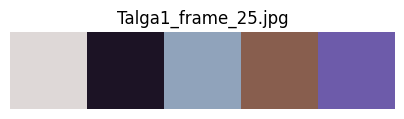

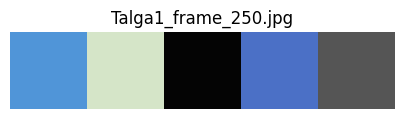

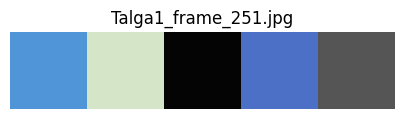

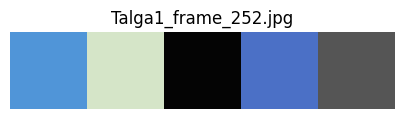

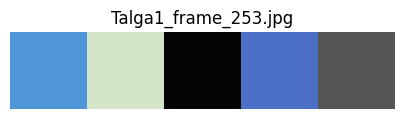

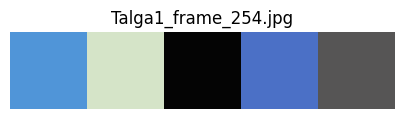

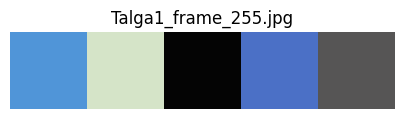

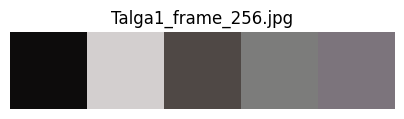

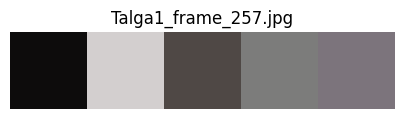

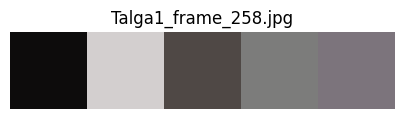

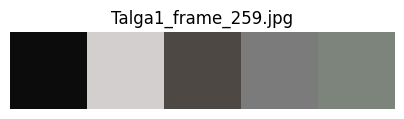

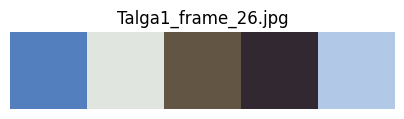

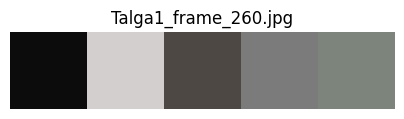

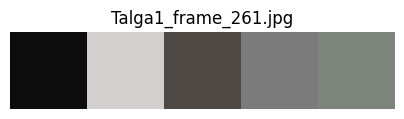

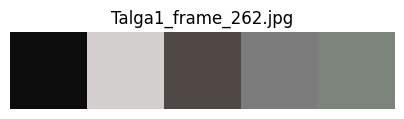

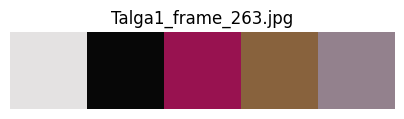

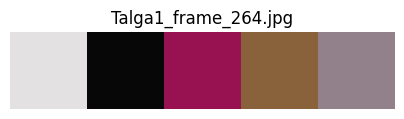

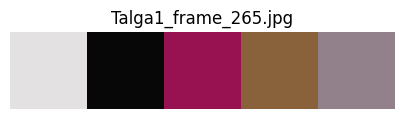

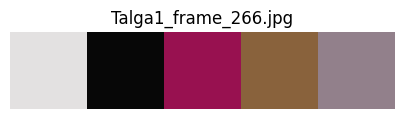

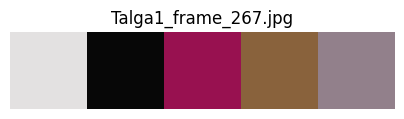

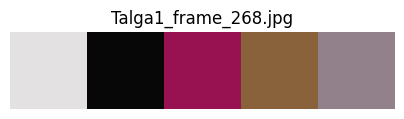

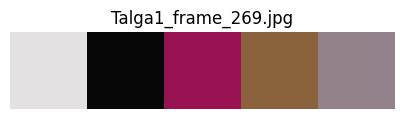

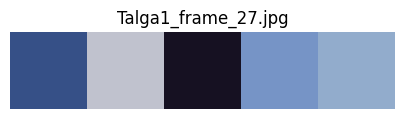

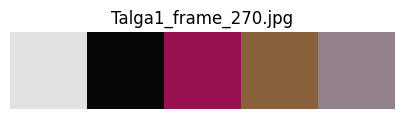

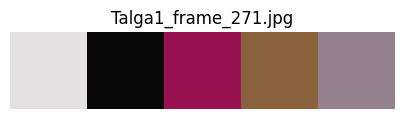

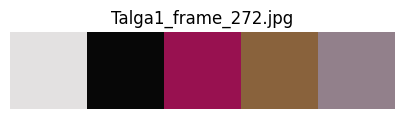

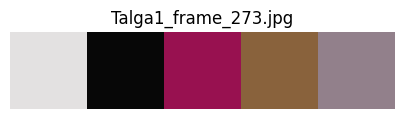

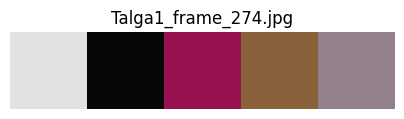

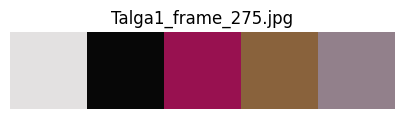

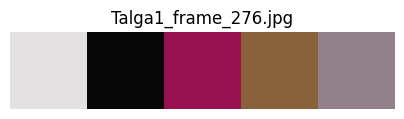

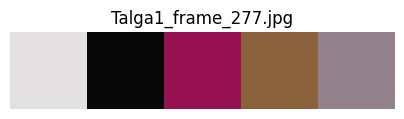

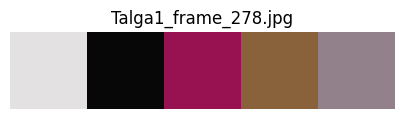

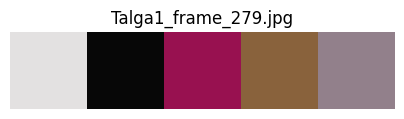

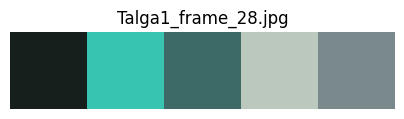

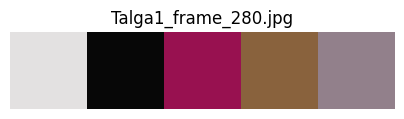

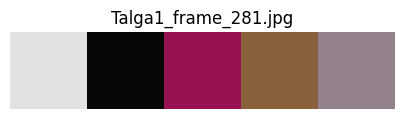

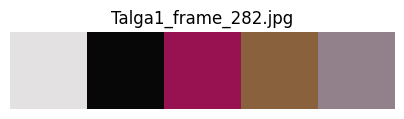

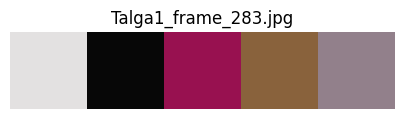

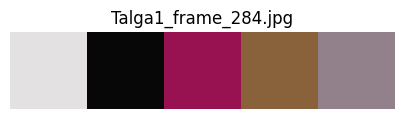

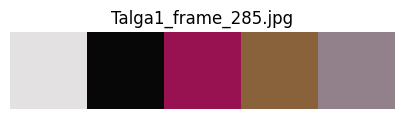

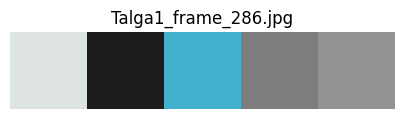

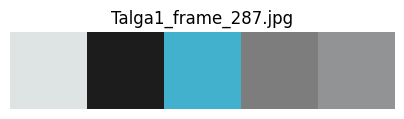

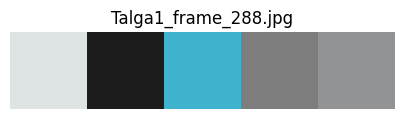

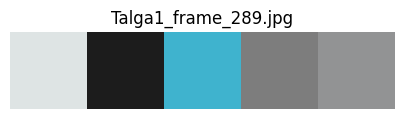

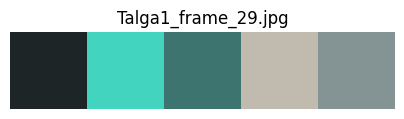

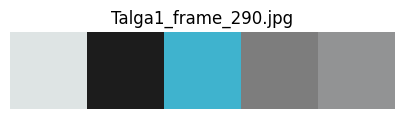

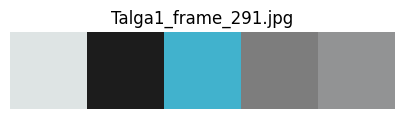

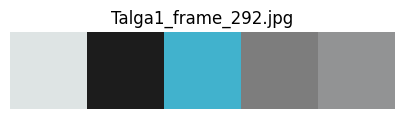

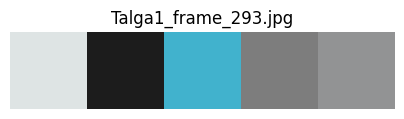

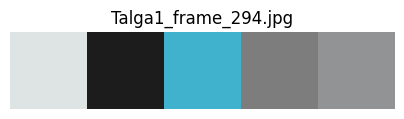

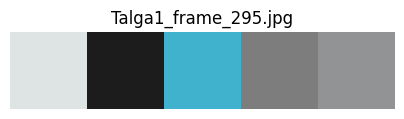

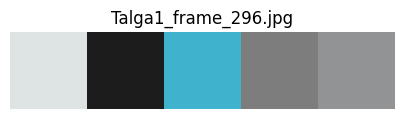

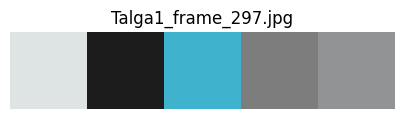

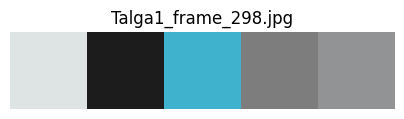

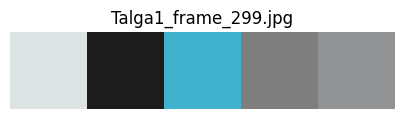

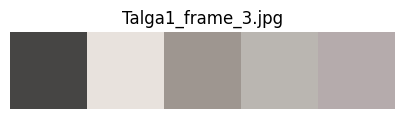

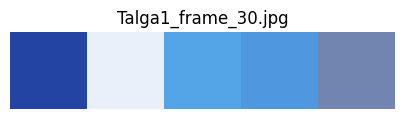

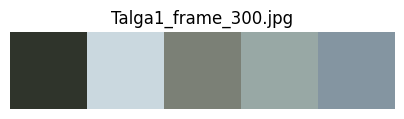

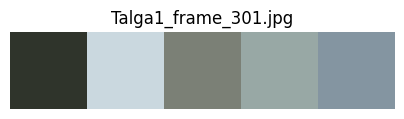

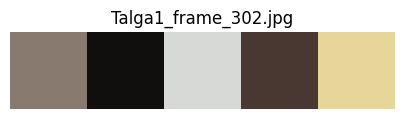

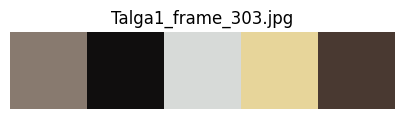

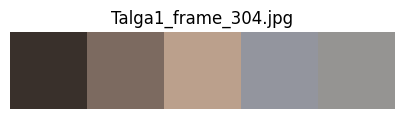

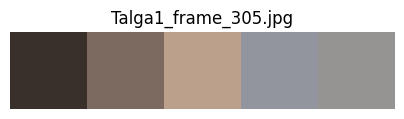

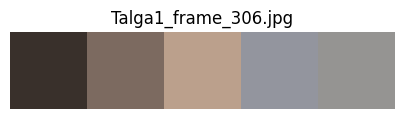

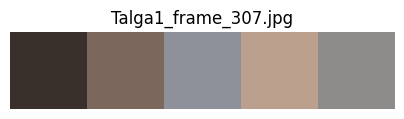

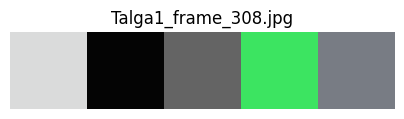

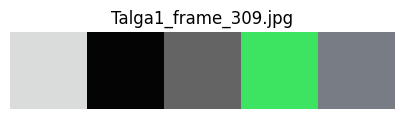

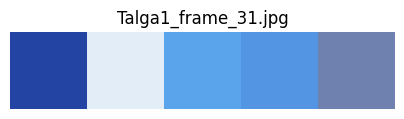

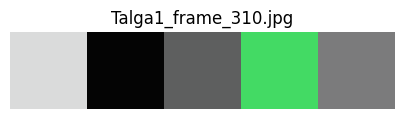

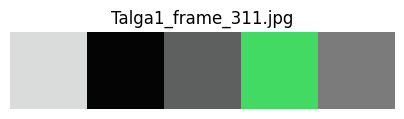

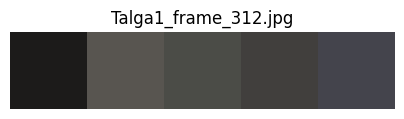

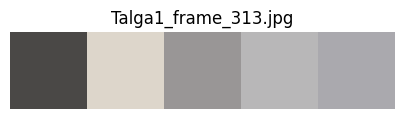

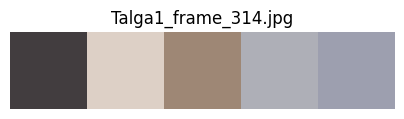

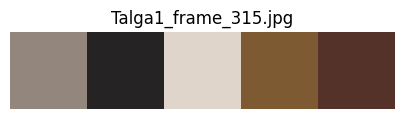

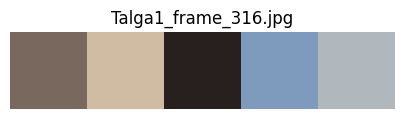

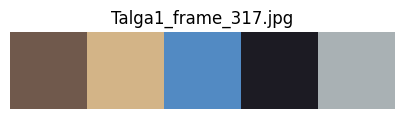

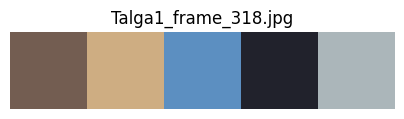

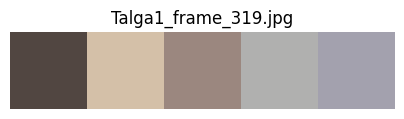

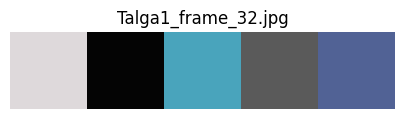

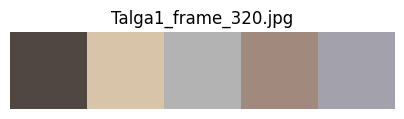

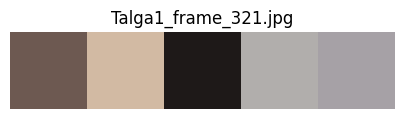

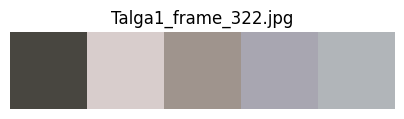

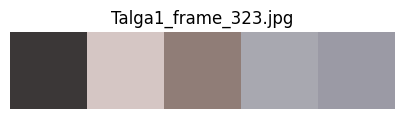

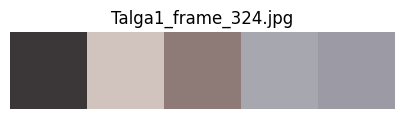

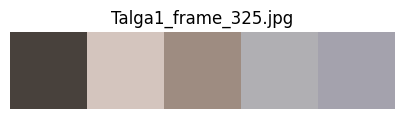

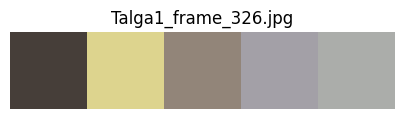

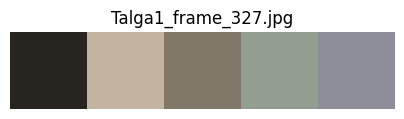

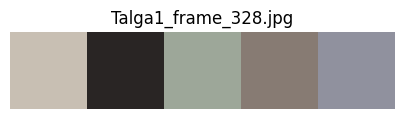

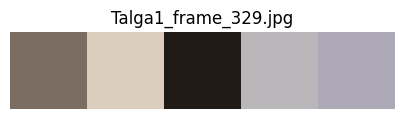

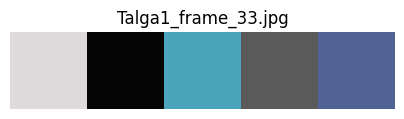

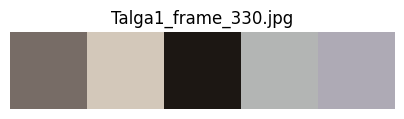

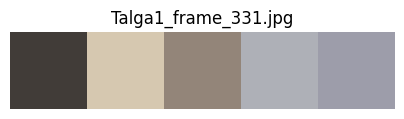

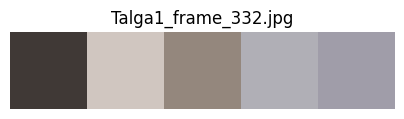

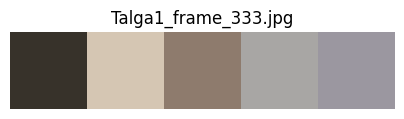

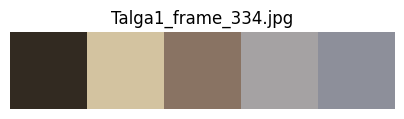

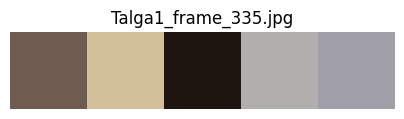

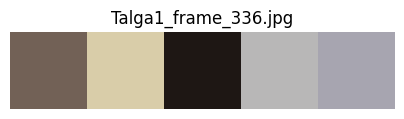

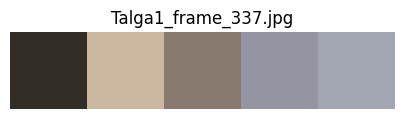

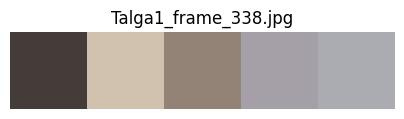

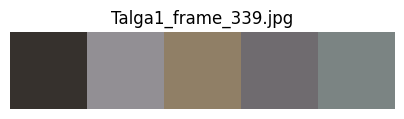

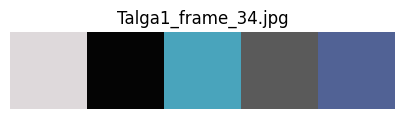

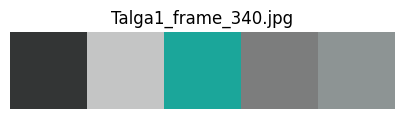

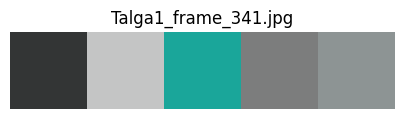

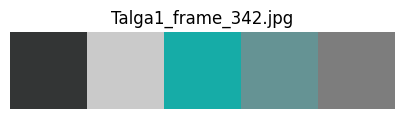

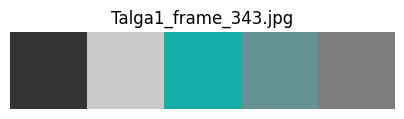

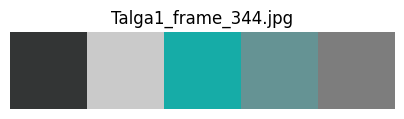

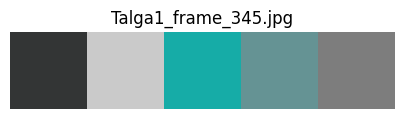

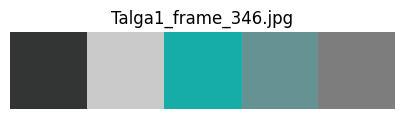

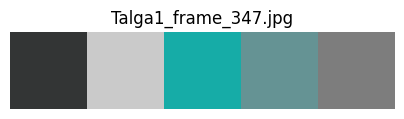

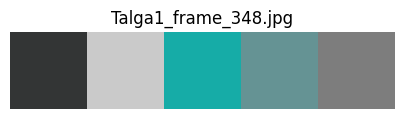

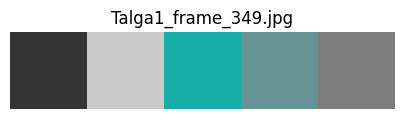

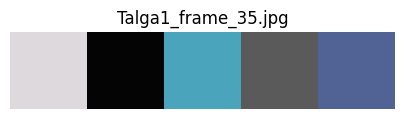

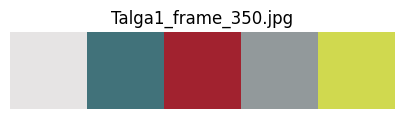

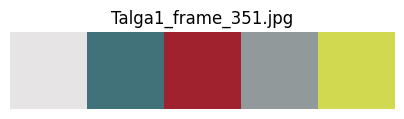

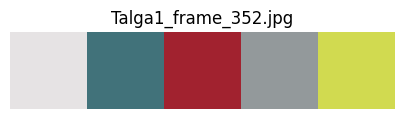

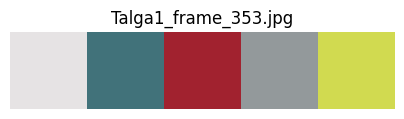

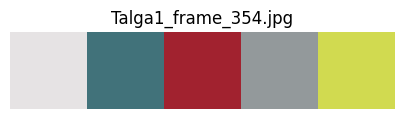

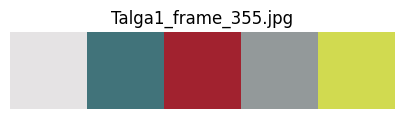

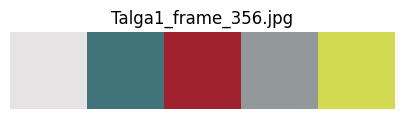

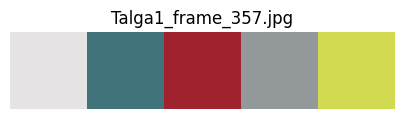

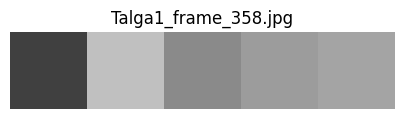

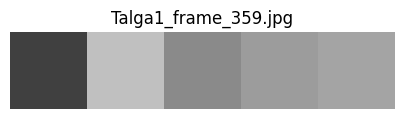

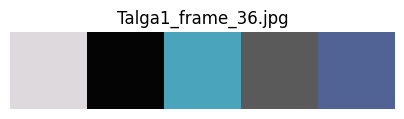

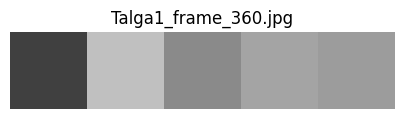

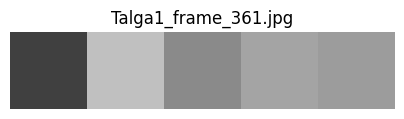

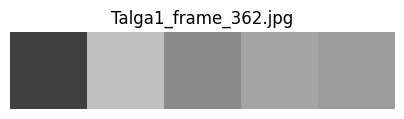

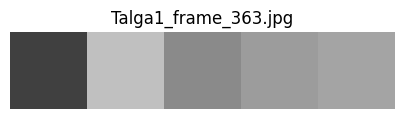

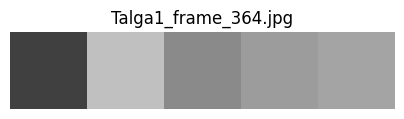

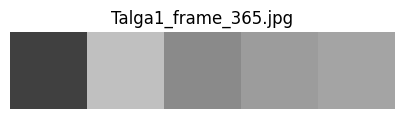

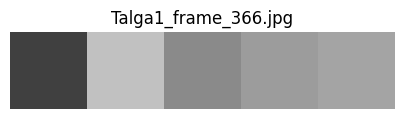

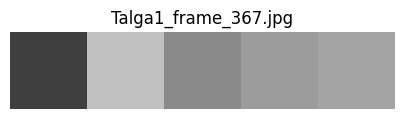

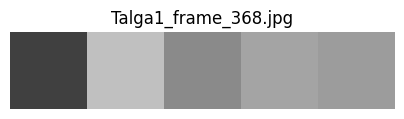

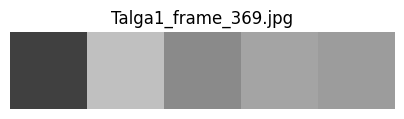

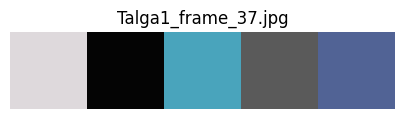

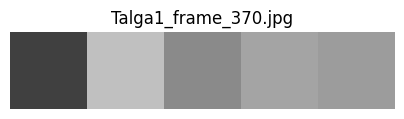

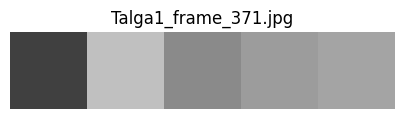

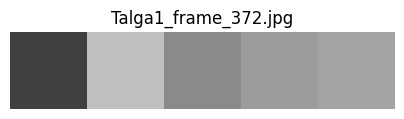

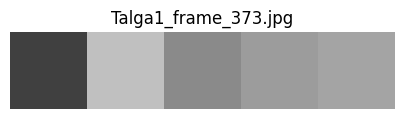

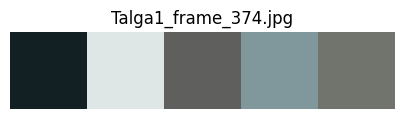

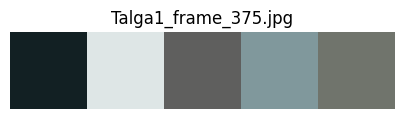

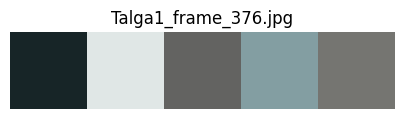

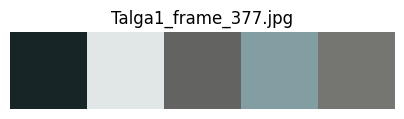

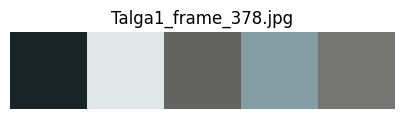

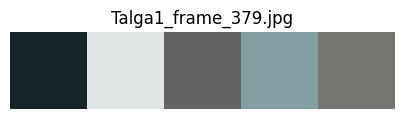

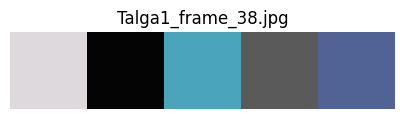

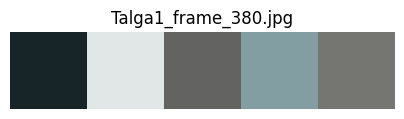

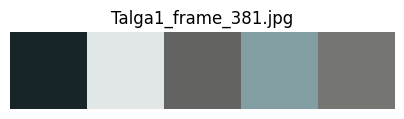

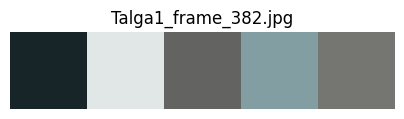

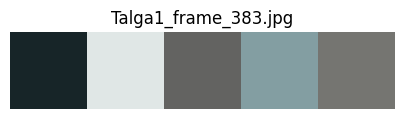

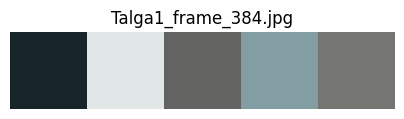

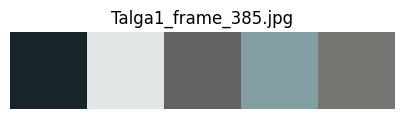

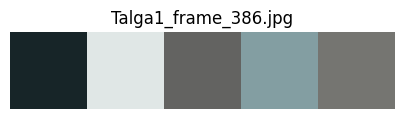

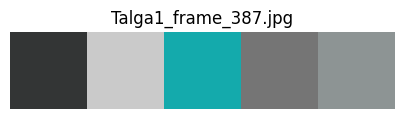

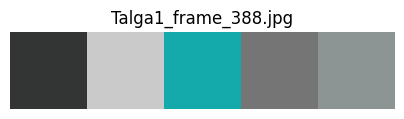

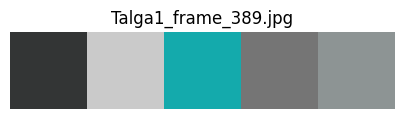

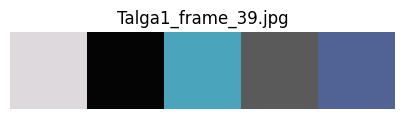

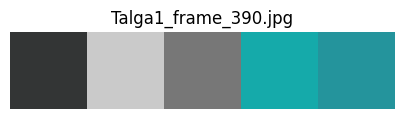

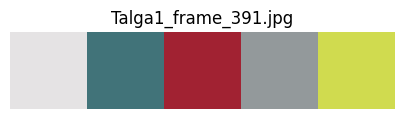

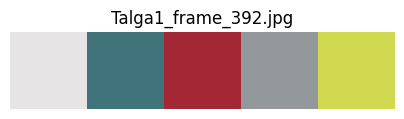

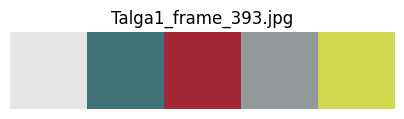

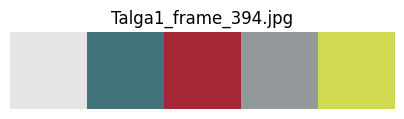

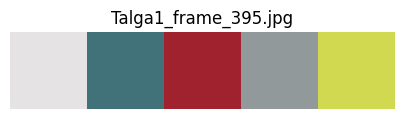

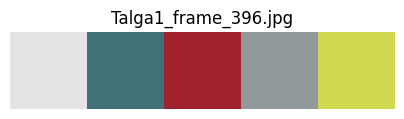

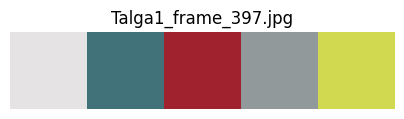

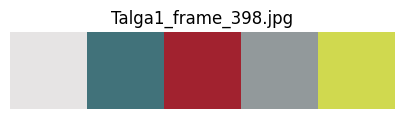

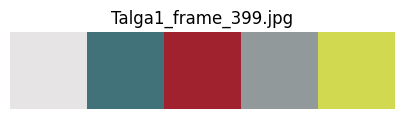

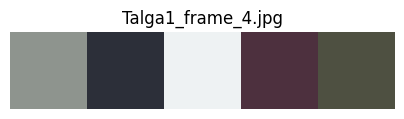

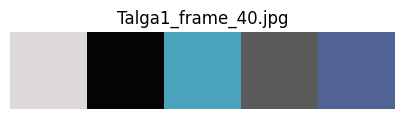

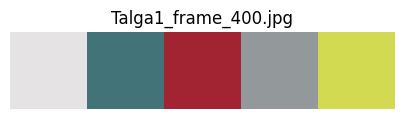

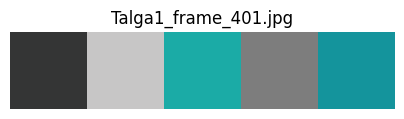

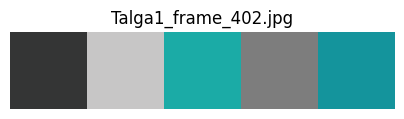

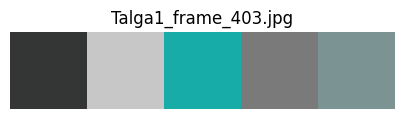

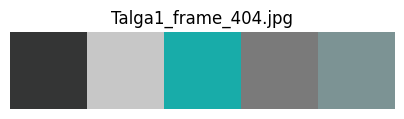

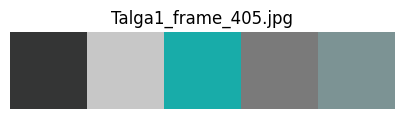

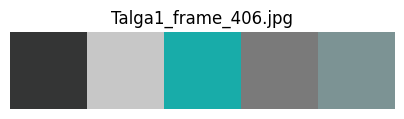

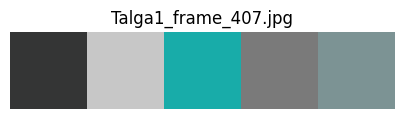

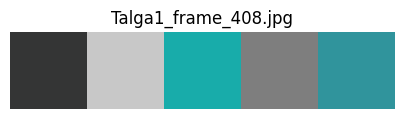

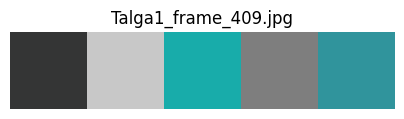

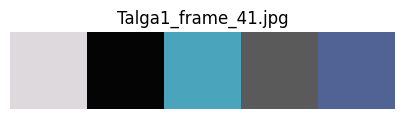

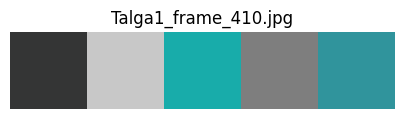

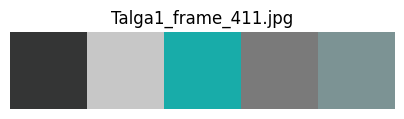

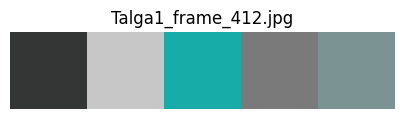

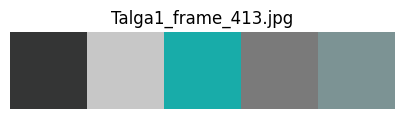

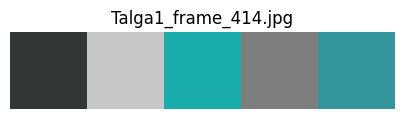

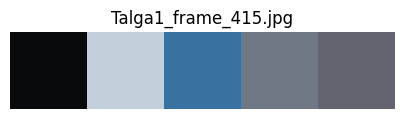

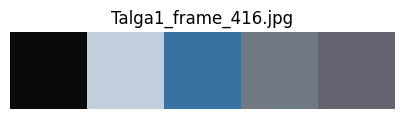

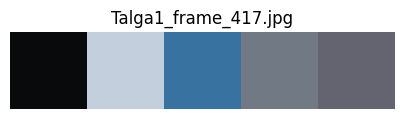

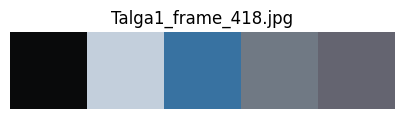

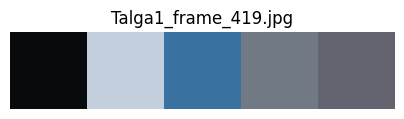

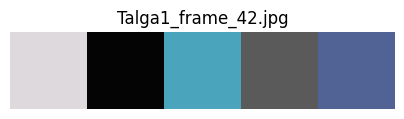

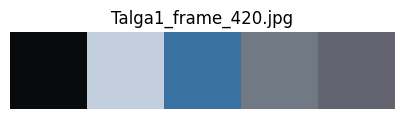

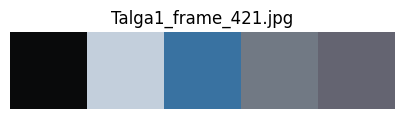

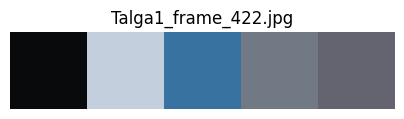

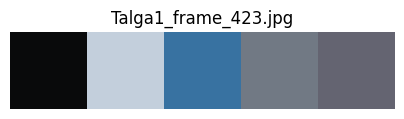

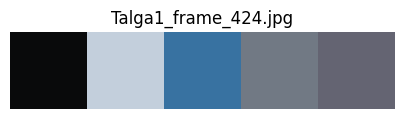

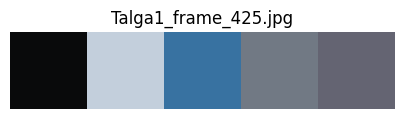

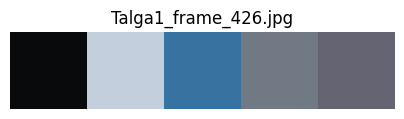

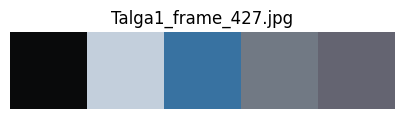

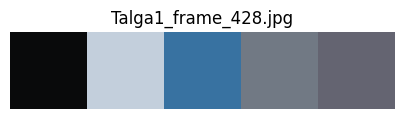

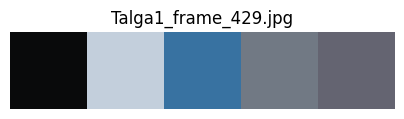

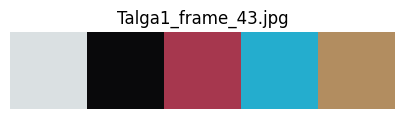

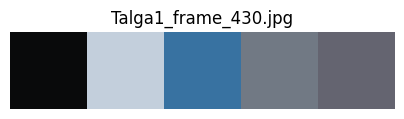

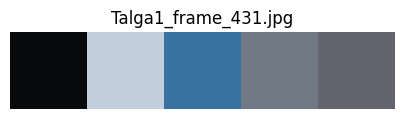

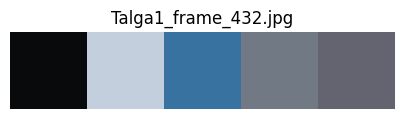

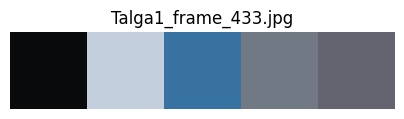

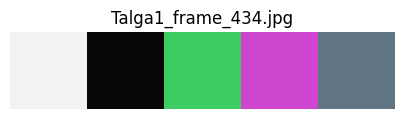

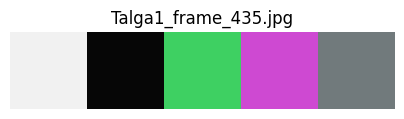

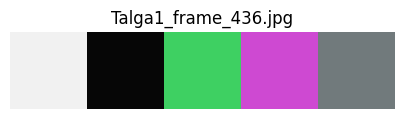

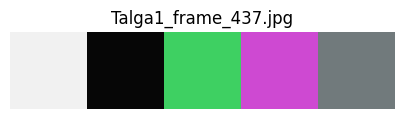

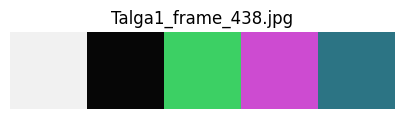

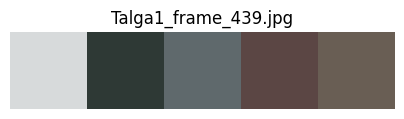

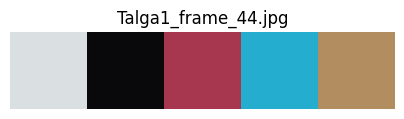

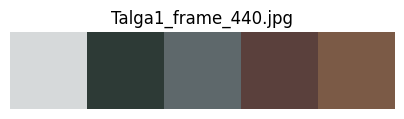

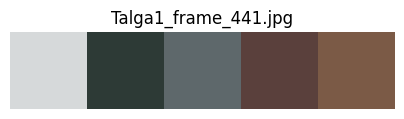

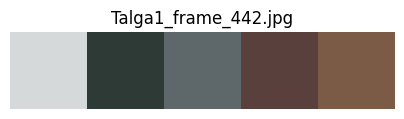

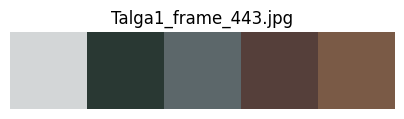

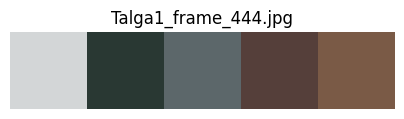

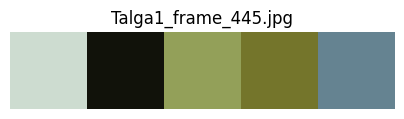

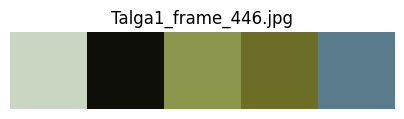

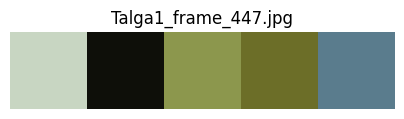

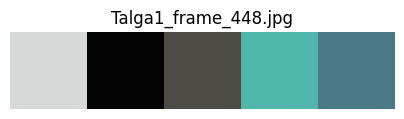

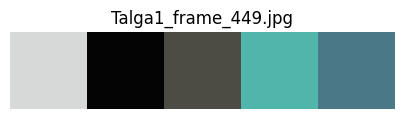

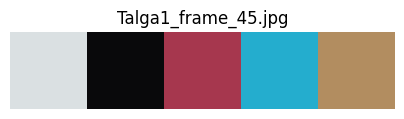

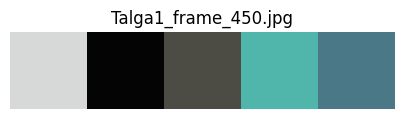

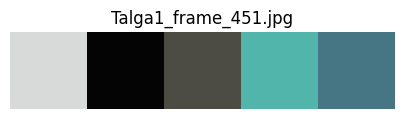

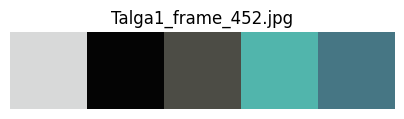

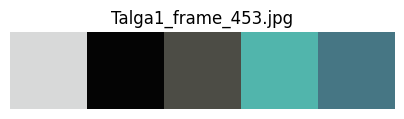

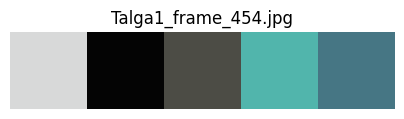

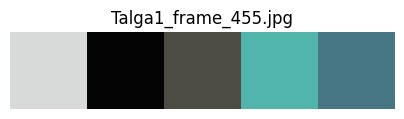

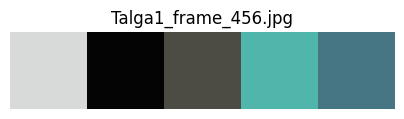

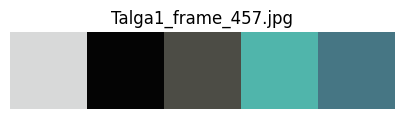

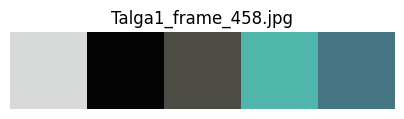

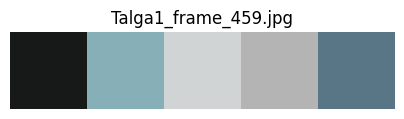

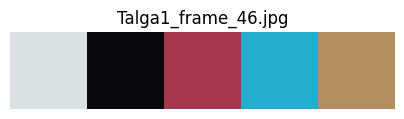

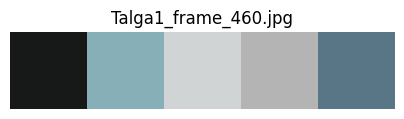

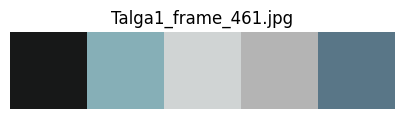

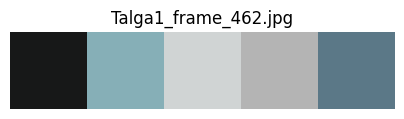

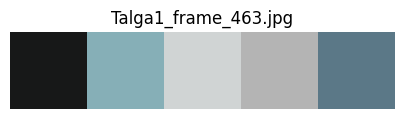

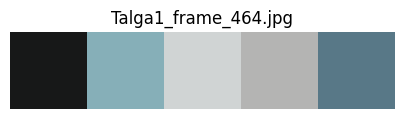

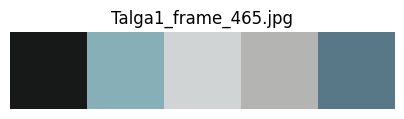

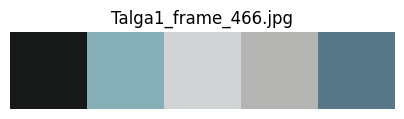

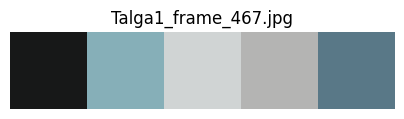

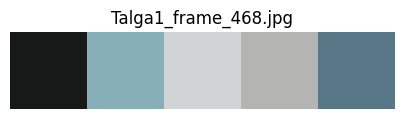

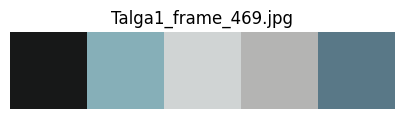

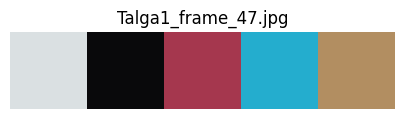

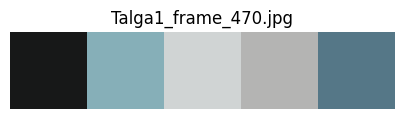

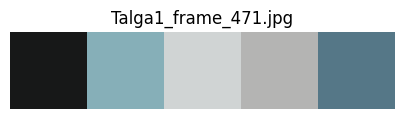

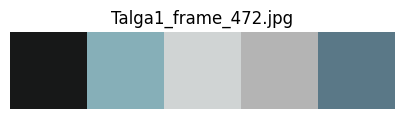

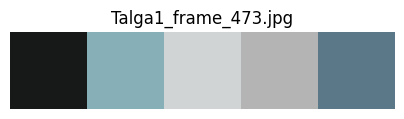

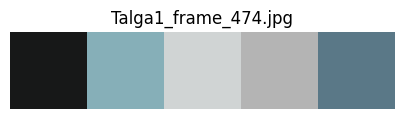

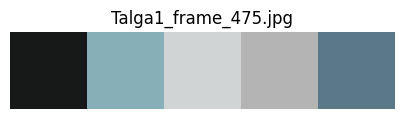

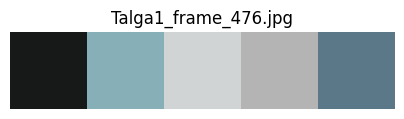

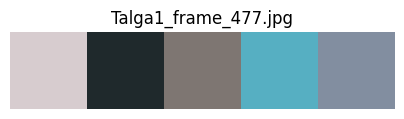

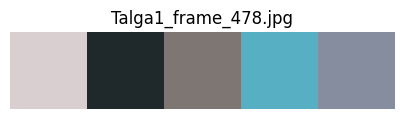

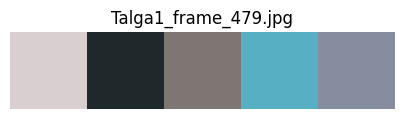

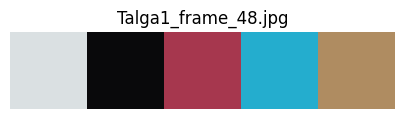

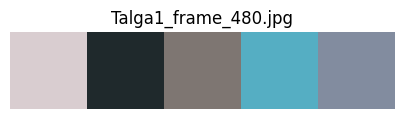

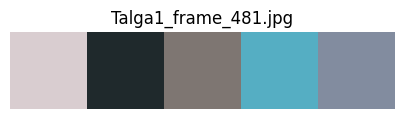

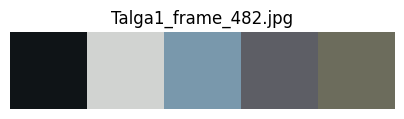

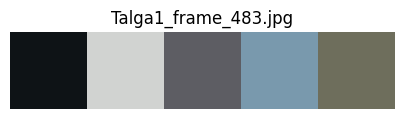

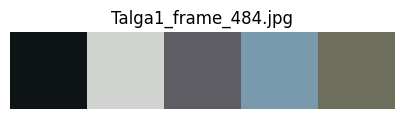

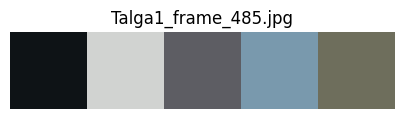

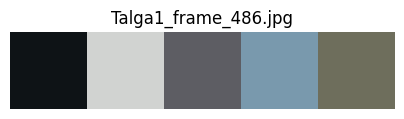

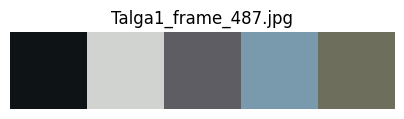

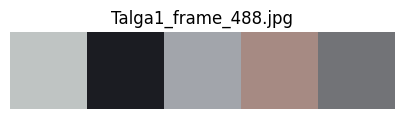

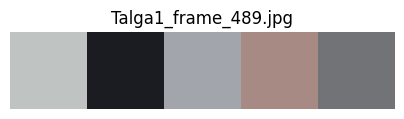

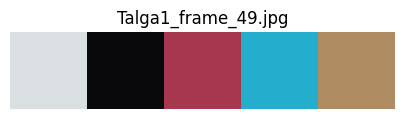

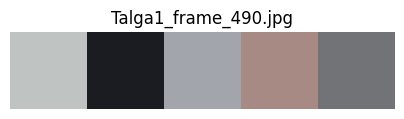

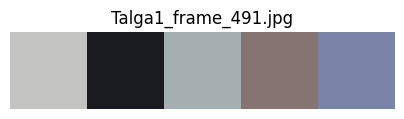

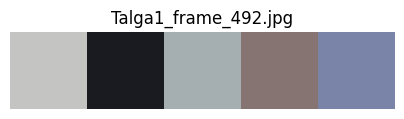

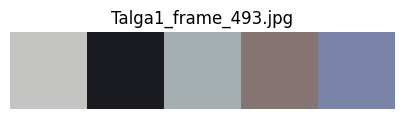

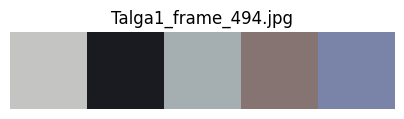

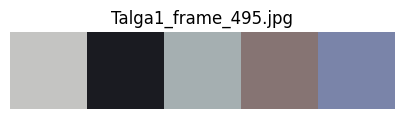

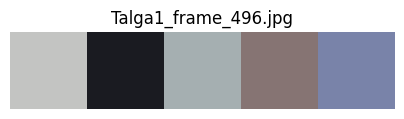

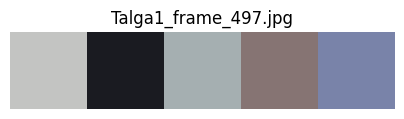

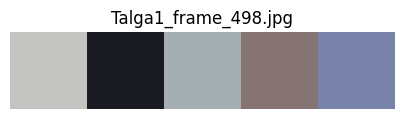

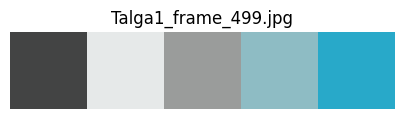

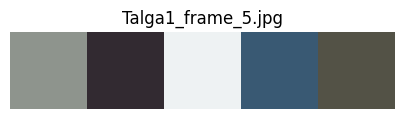

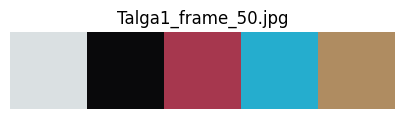

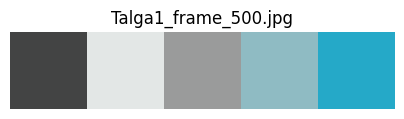

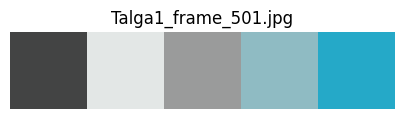

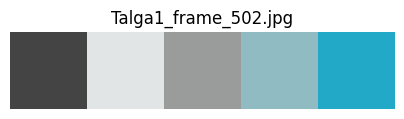

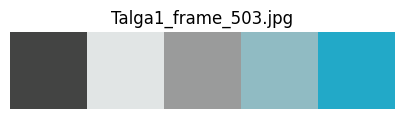

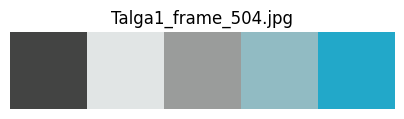

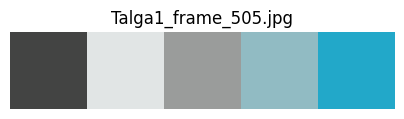

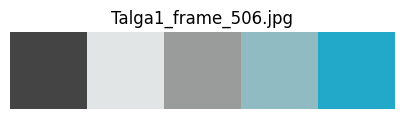

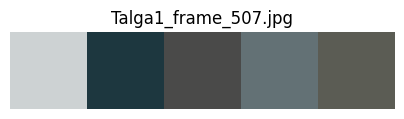

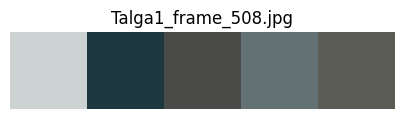

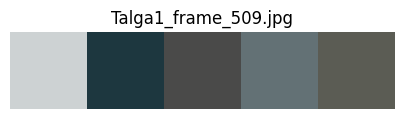

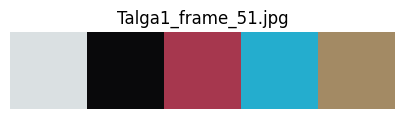

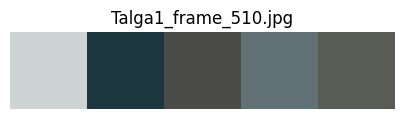

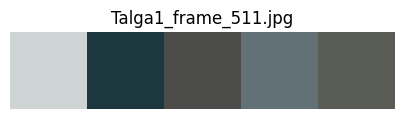

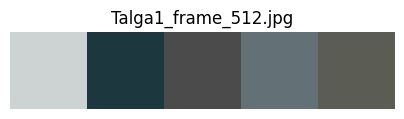

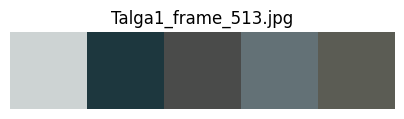

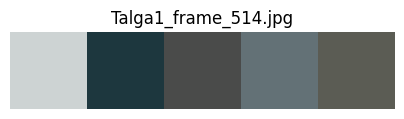

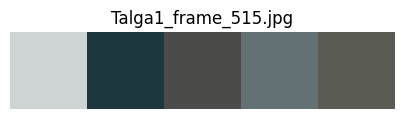

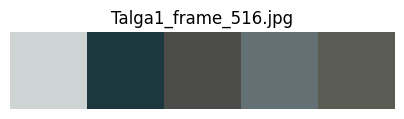

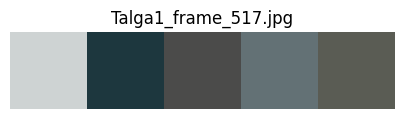

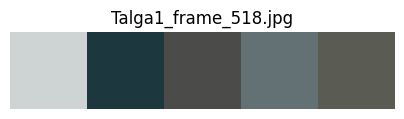

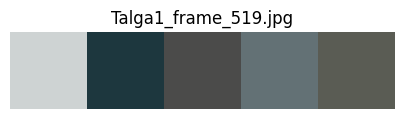

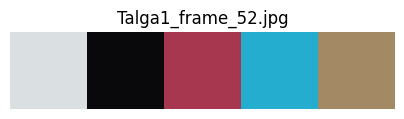

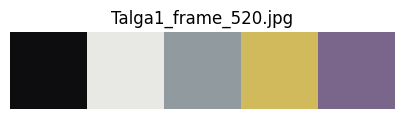

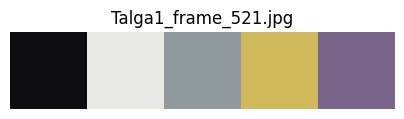

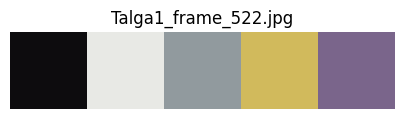

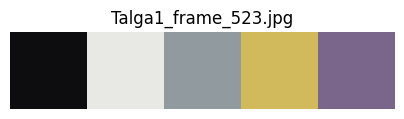

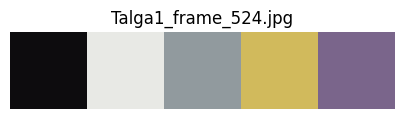

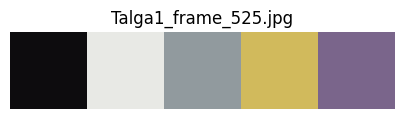

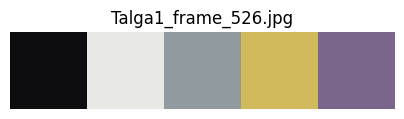

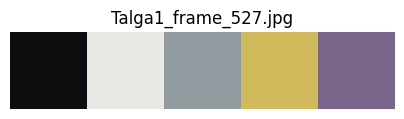

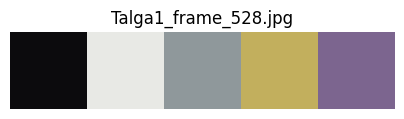

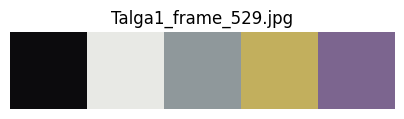

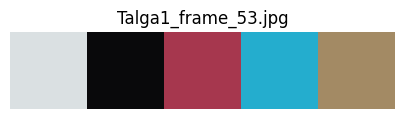

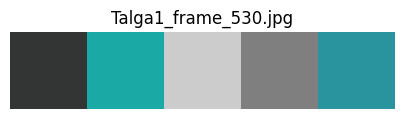

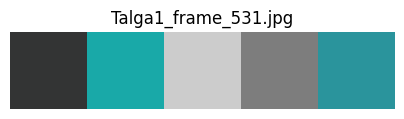

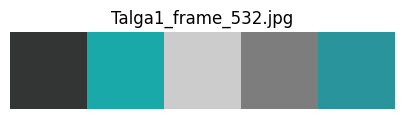

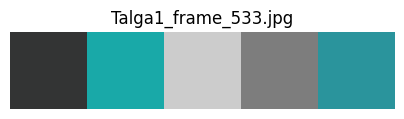

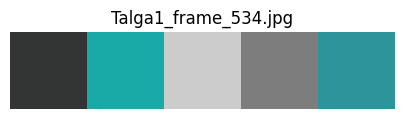

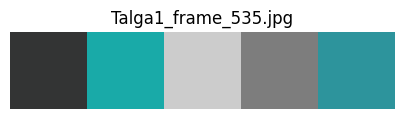

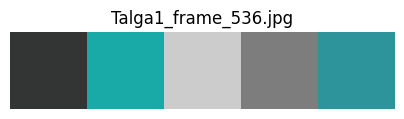

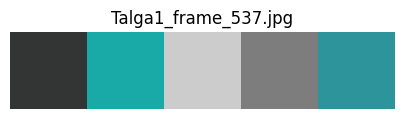

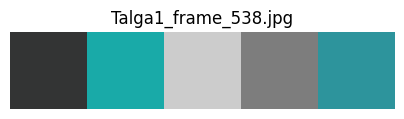

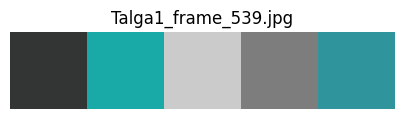

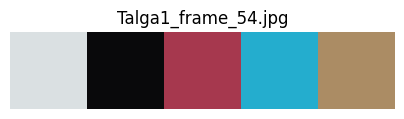

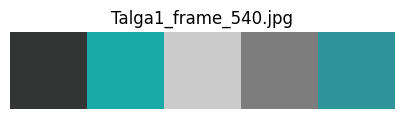

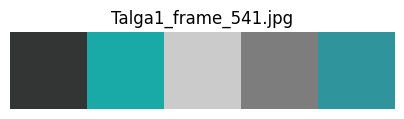

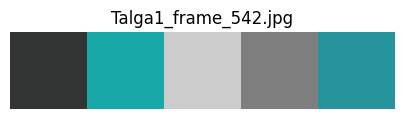

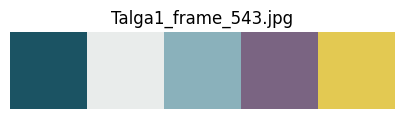

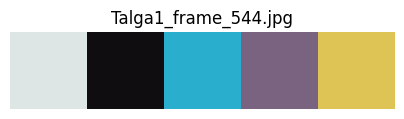

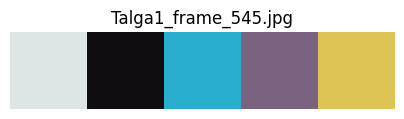

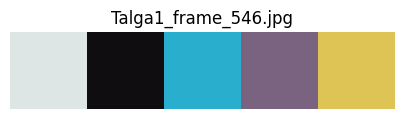

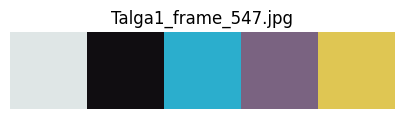

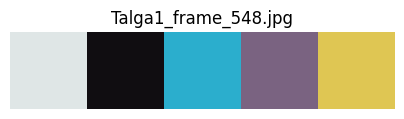

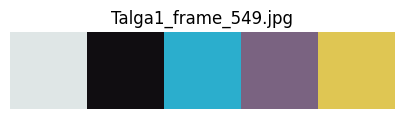

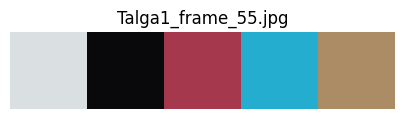

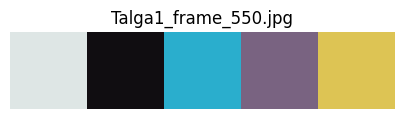

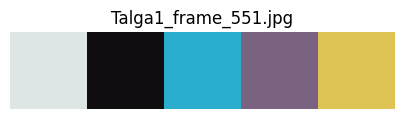

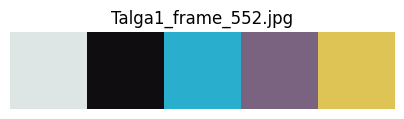

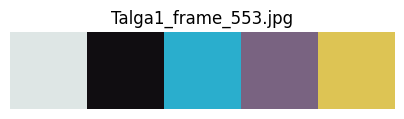

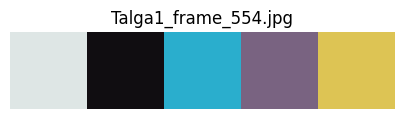

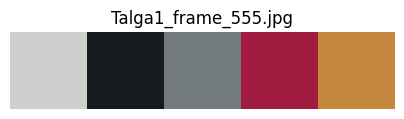

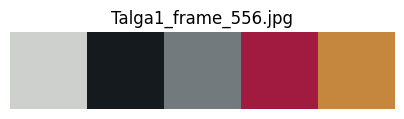

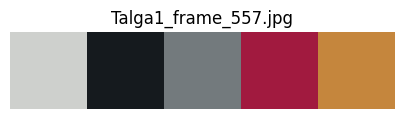

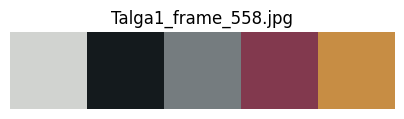

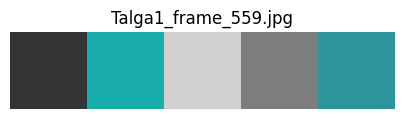

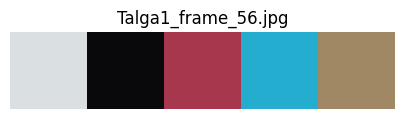

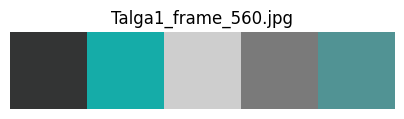

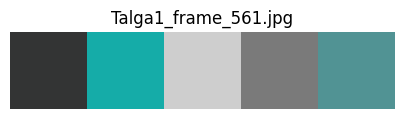

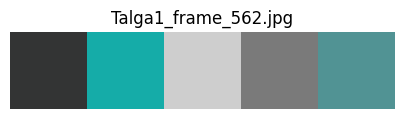

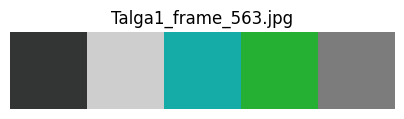

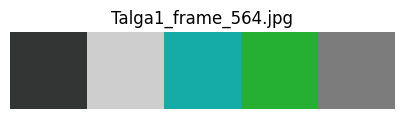

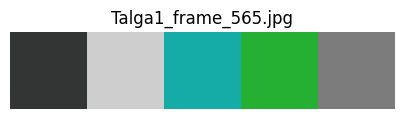

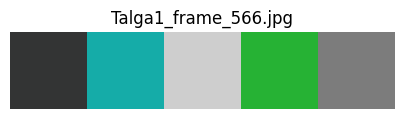

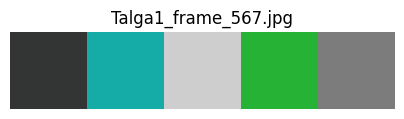

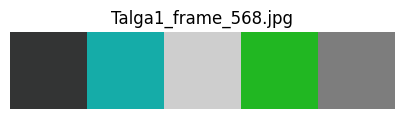

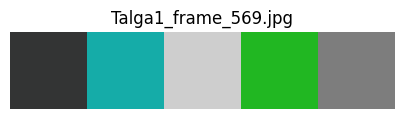

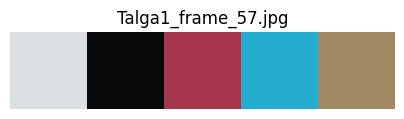

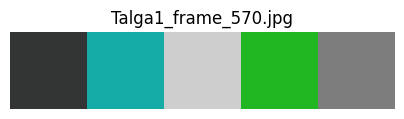

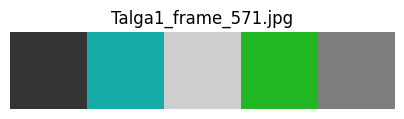

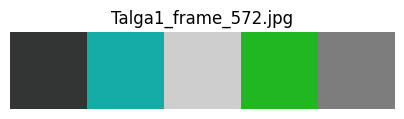

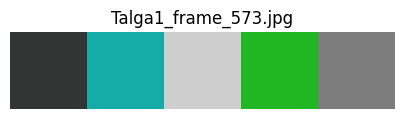

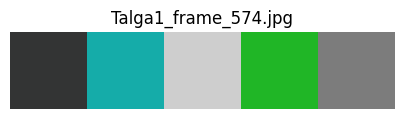

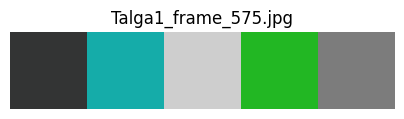

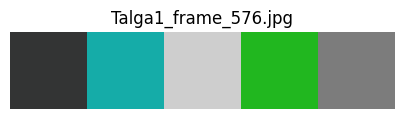

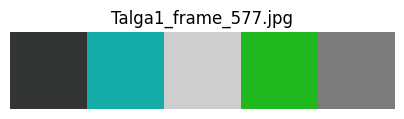

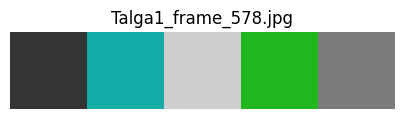

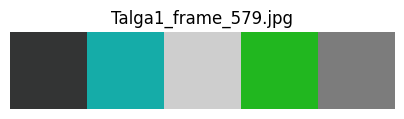

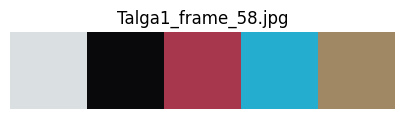

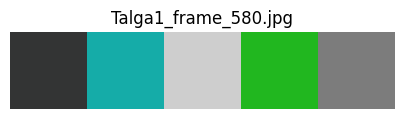

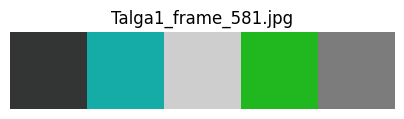

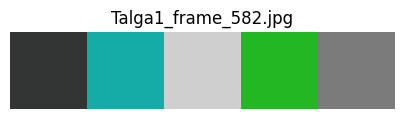

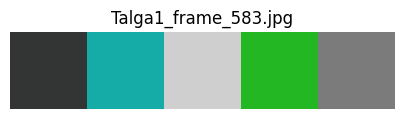

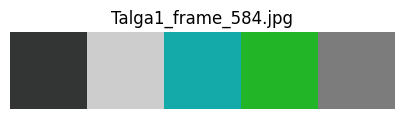

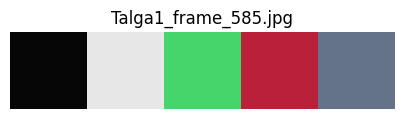

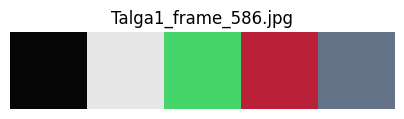

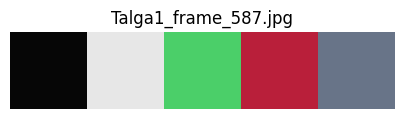

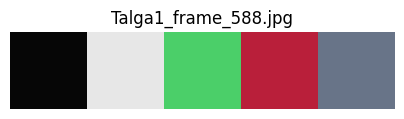

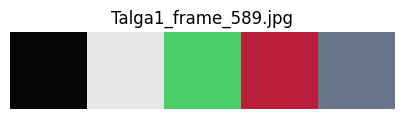

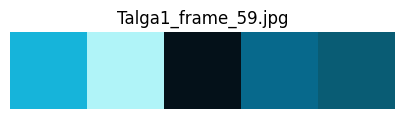

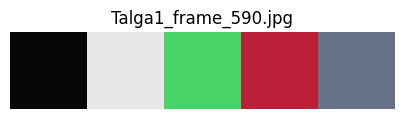

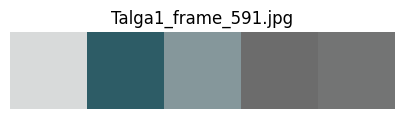

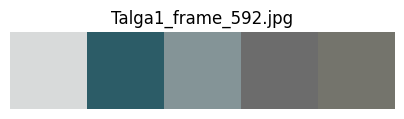

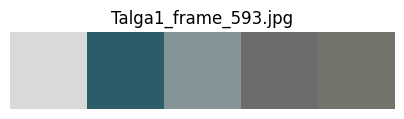

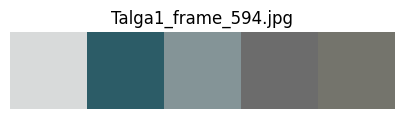

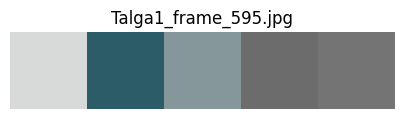

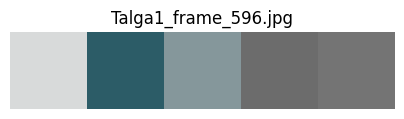

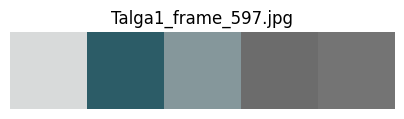

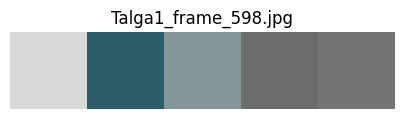

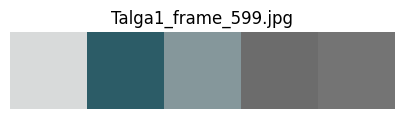

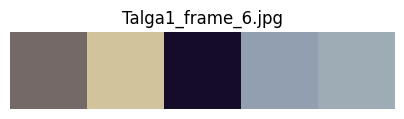

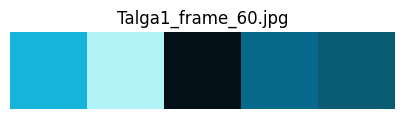

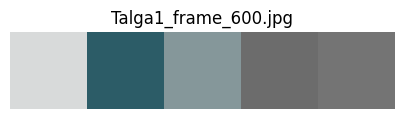

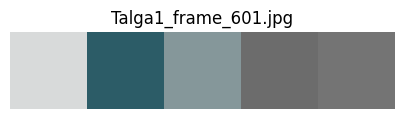

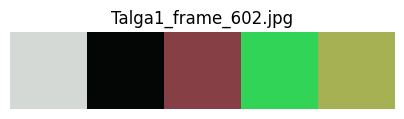

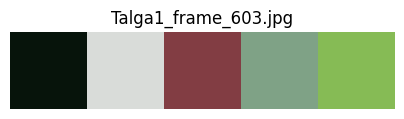

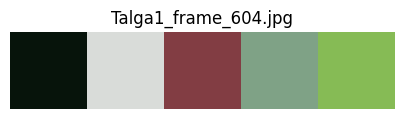

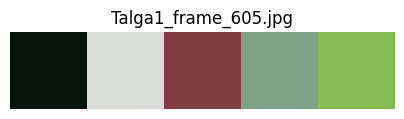

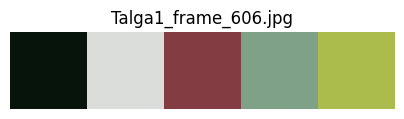

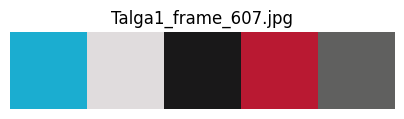

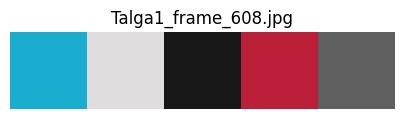

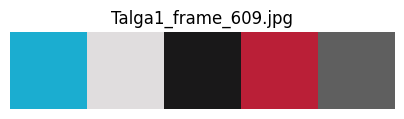

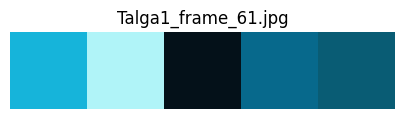

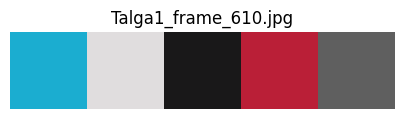

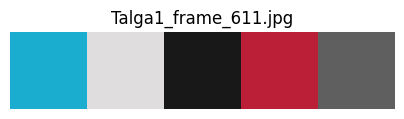

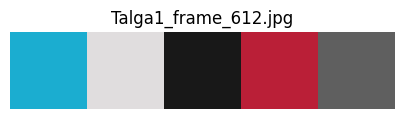

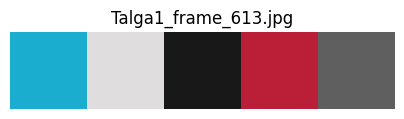

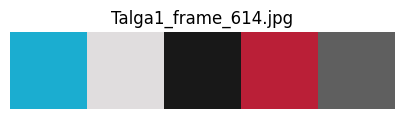

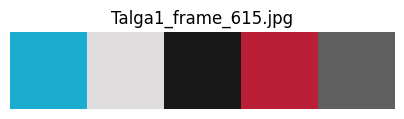

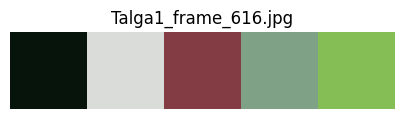

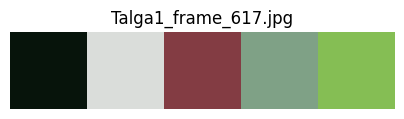

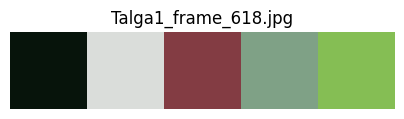

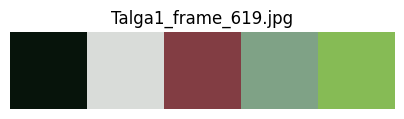

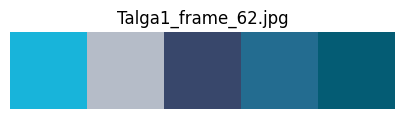

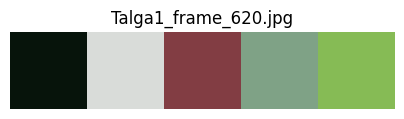

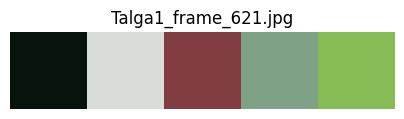

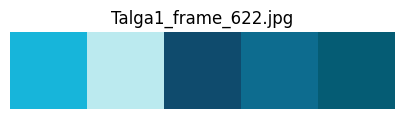

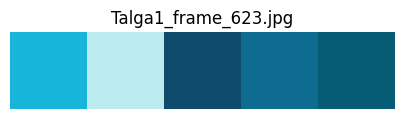

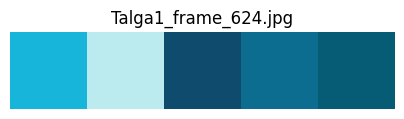

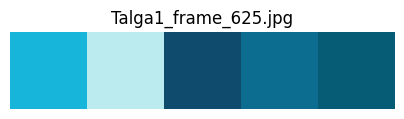

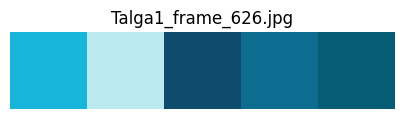

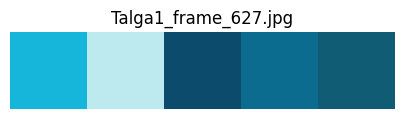

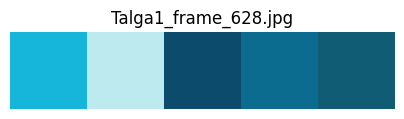

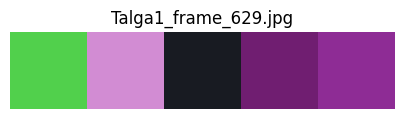

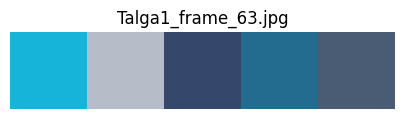

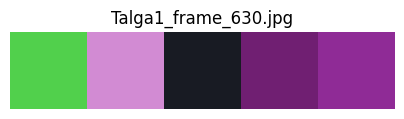

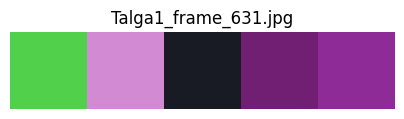

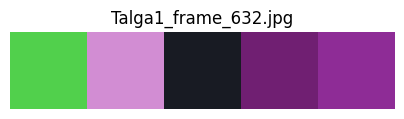

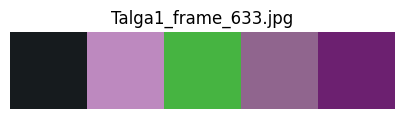

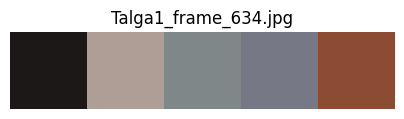

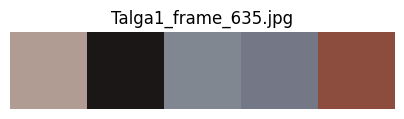

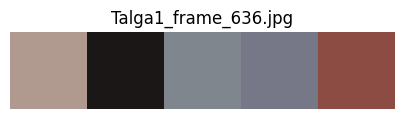

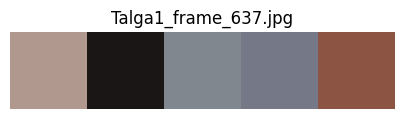

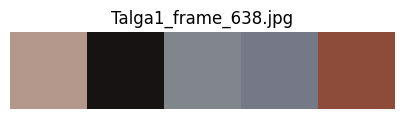

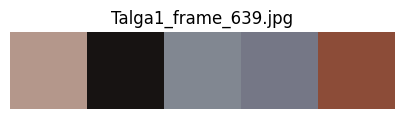

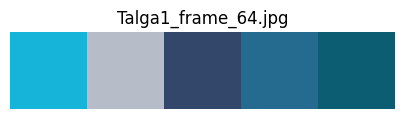

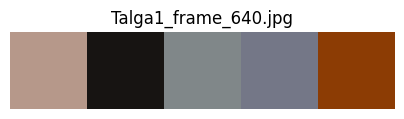

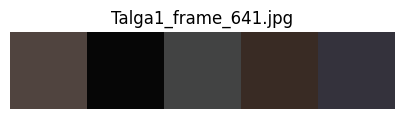

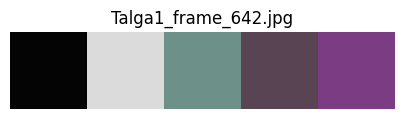

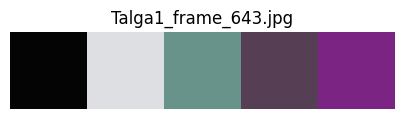

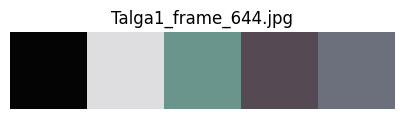

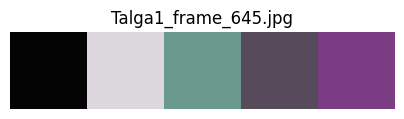

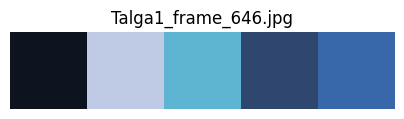

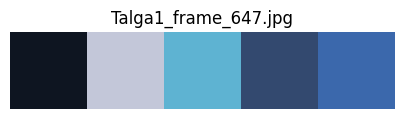

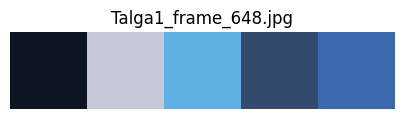

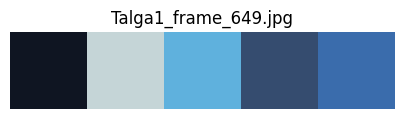

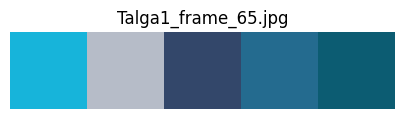

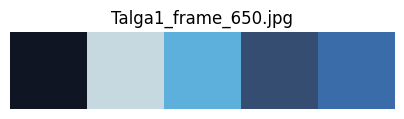

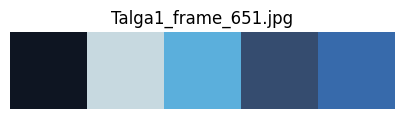

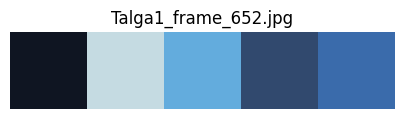

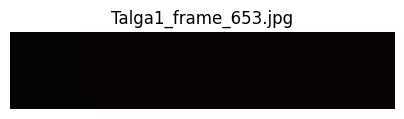

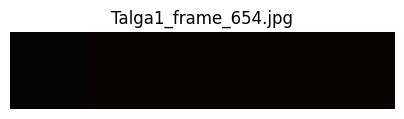

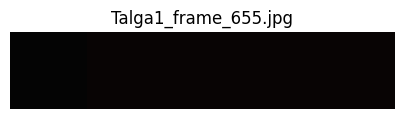

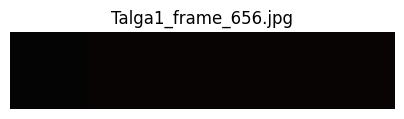

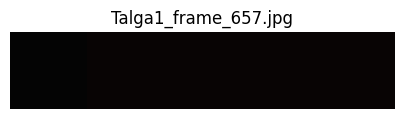

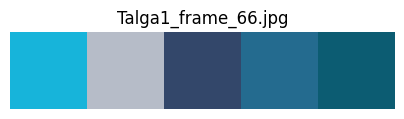

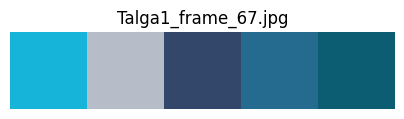

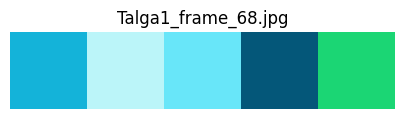

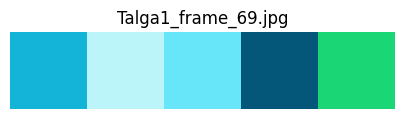

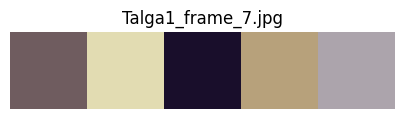

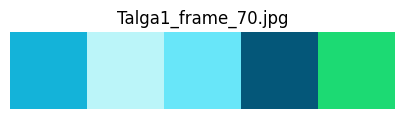

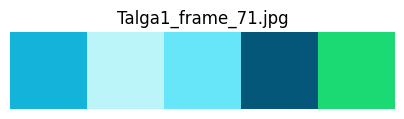

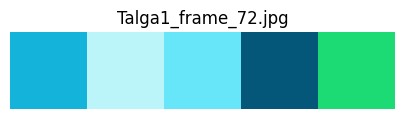

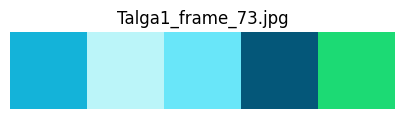

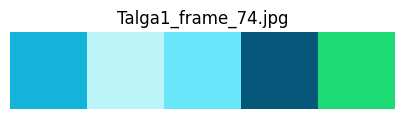

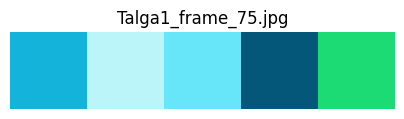

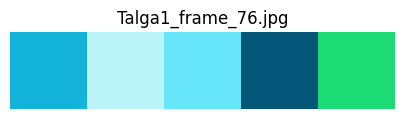

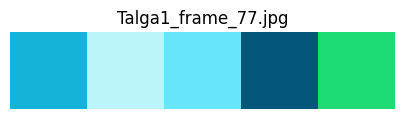

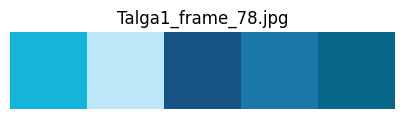

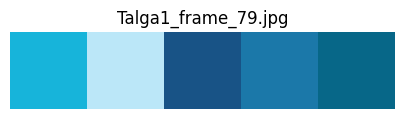

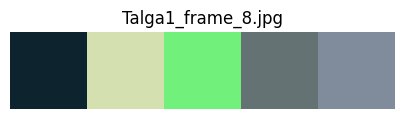

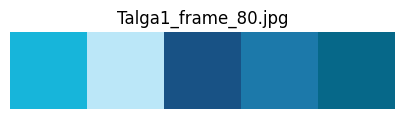

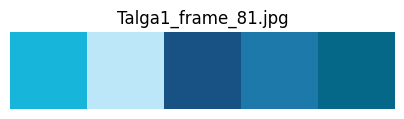

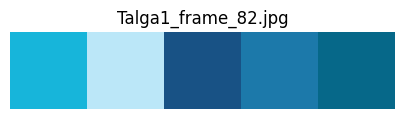

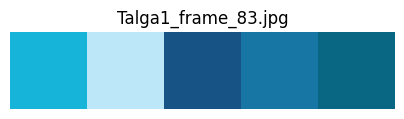

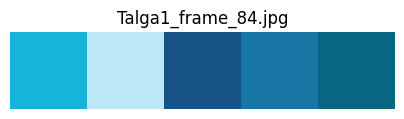

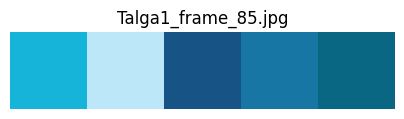

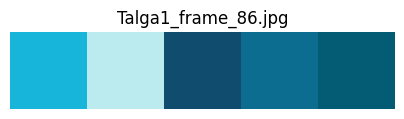

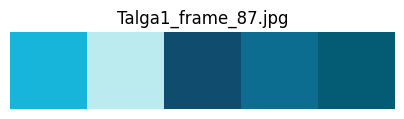

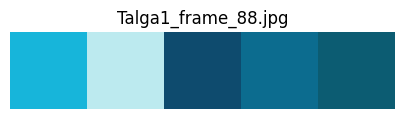

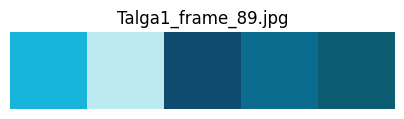

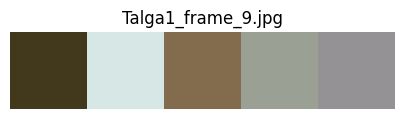

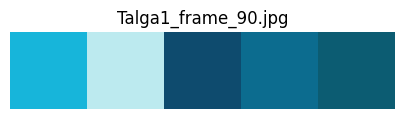

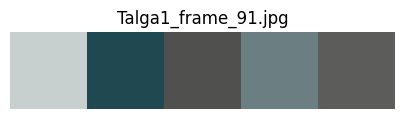

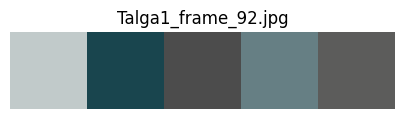

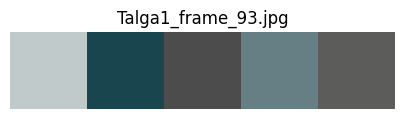

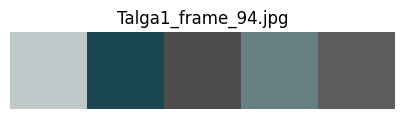

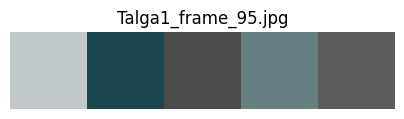

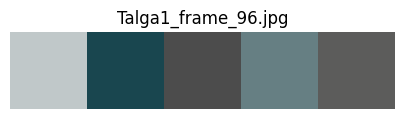

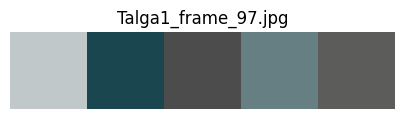

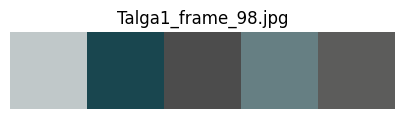

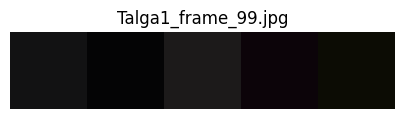


--- Processing TalgaVideo2.mp4 ---
✅ Saved 140 frames for Talga2.
Skipping frames_Talga2/Talga2_frame_0.jpg: Empty pixels when quantize.
✅ CSV saved for Talga2: Talga2_colors.csv
🎨 Dominant Colour Counts for Talga2:
Other: 41 frames
Green: 32 frames
Blue: 66 frames


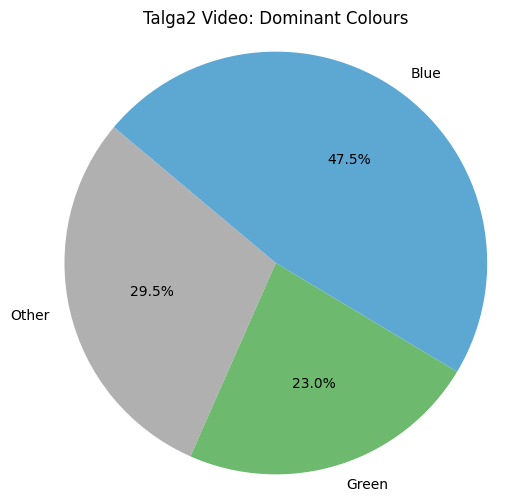

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Pie chart saved and downloaded: Talga2_piechart.png
Skipping frames_Talga2/Talga2_frame_0.jpg for palette plot: Empty pixels when quantize.


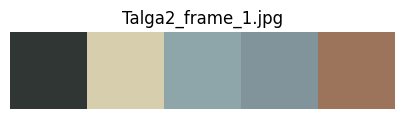

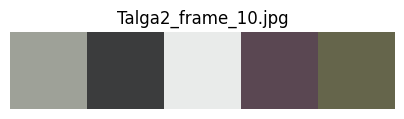

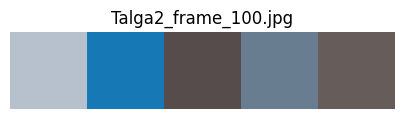

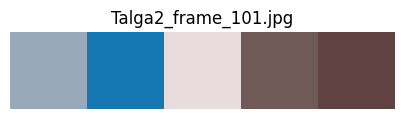

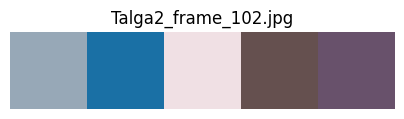

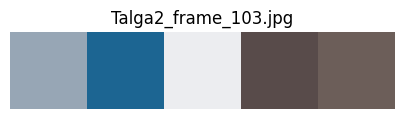

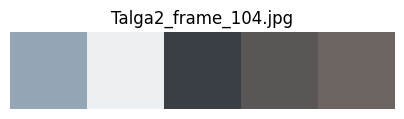

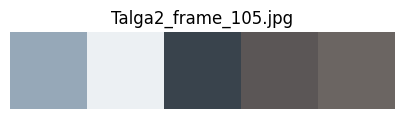

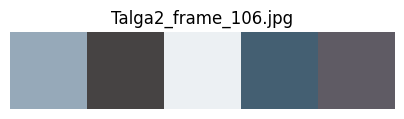

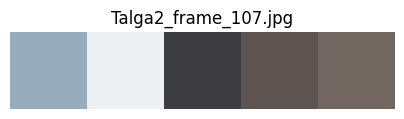

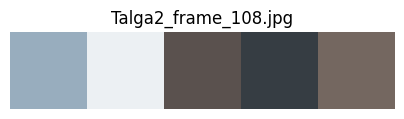

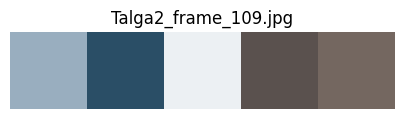

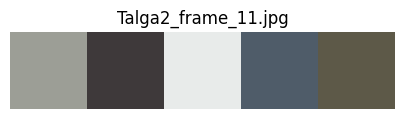

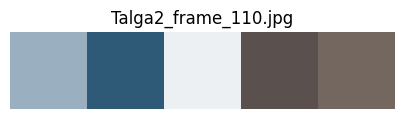

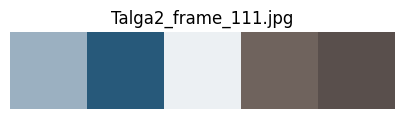

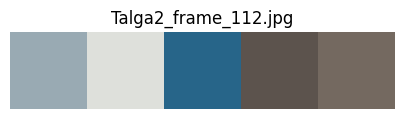

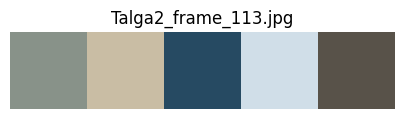

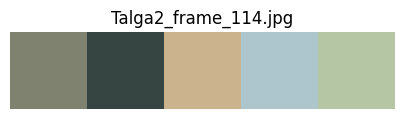

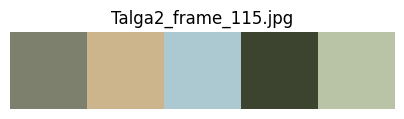

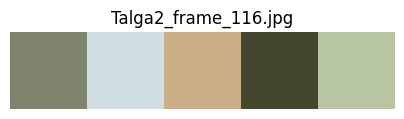

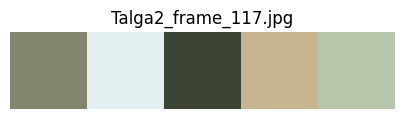

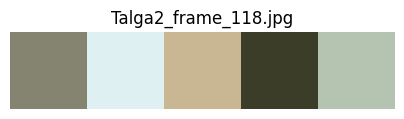

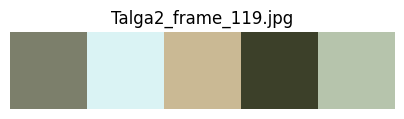

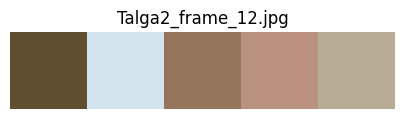

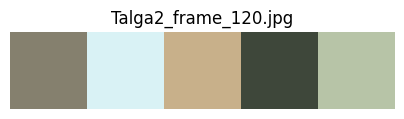

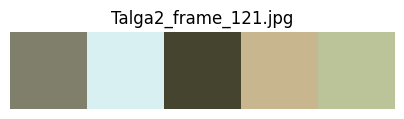

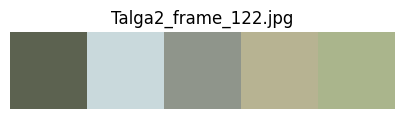

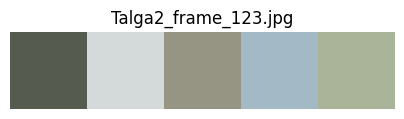

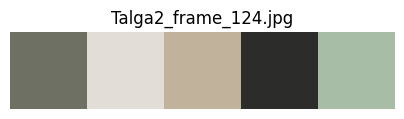

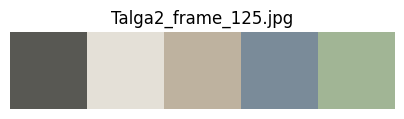

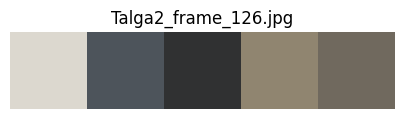

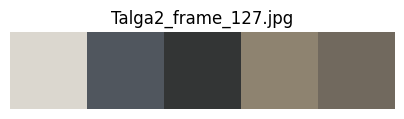

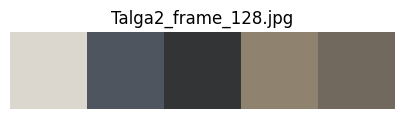

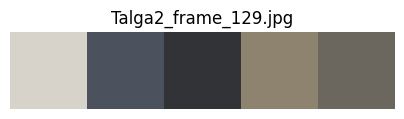

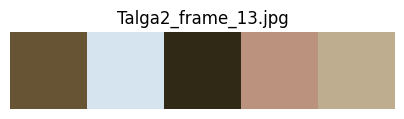

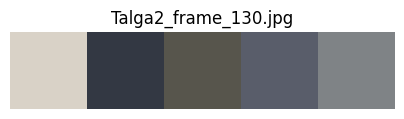

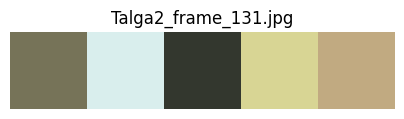

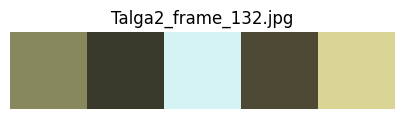

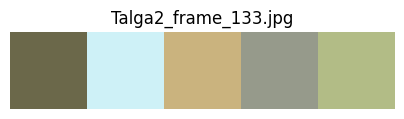

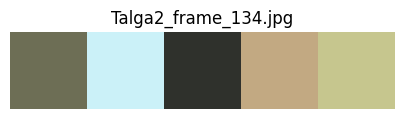

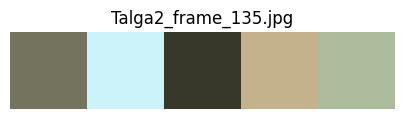

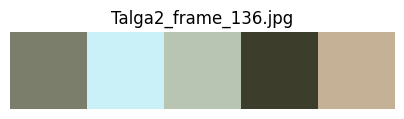

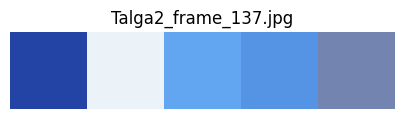

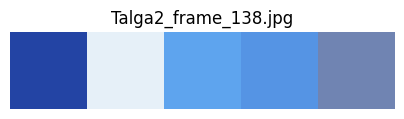

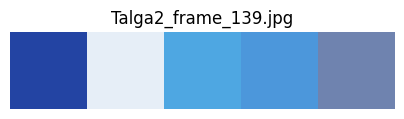

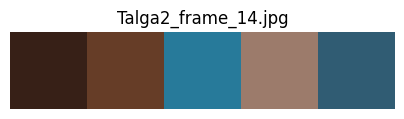

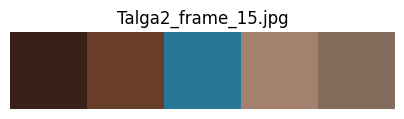

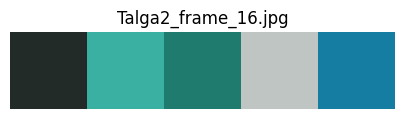

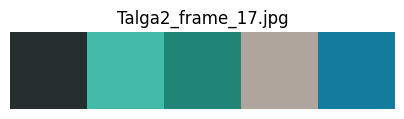

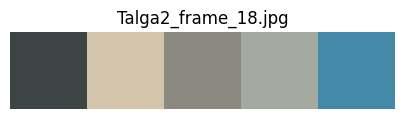

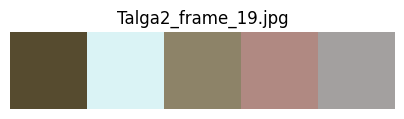

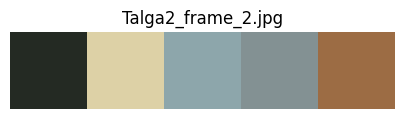

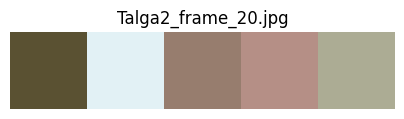

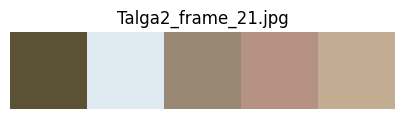

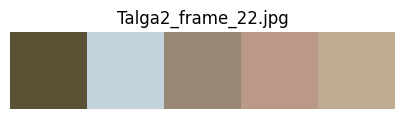

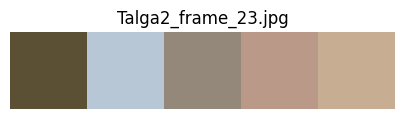

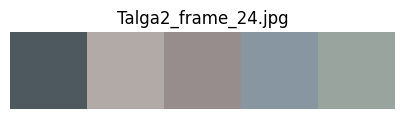

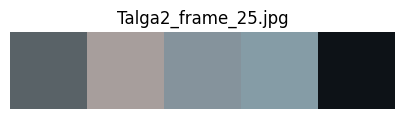

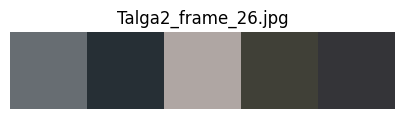

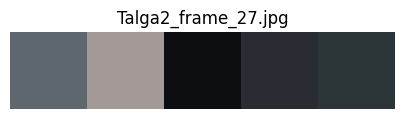

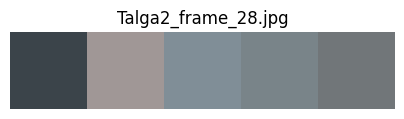

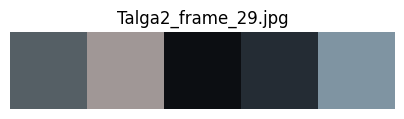

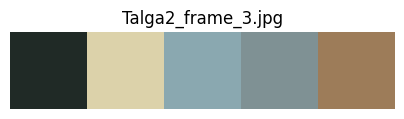

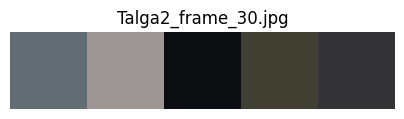

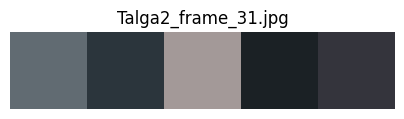

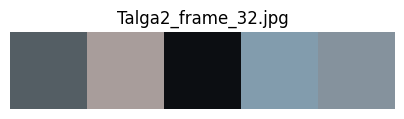

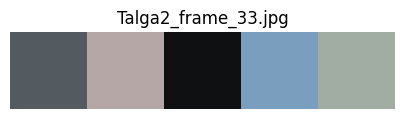

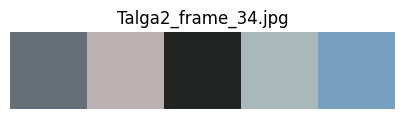

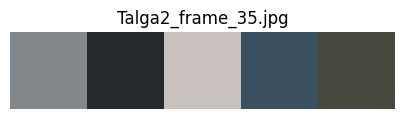

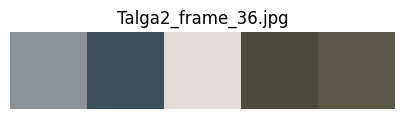

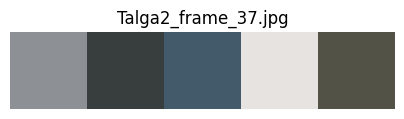

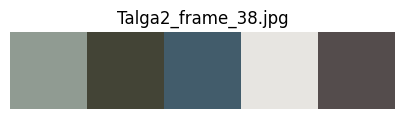

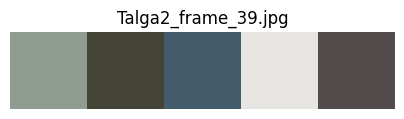

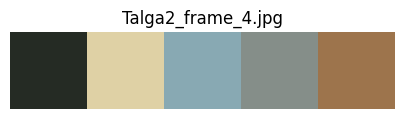

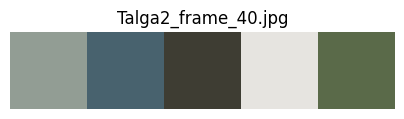

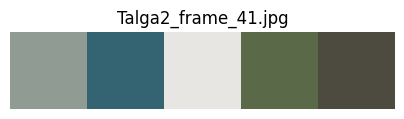

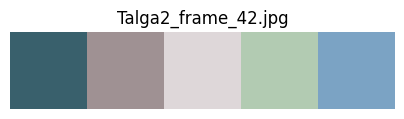

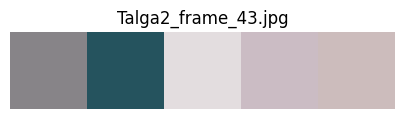

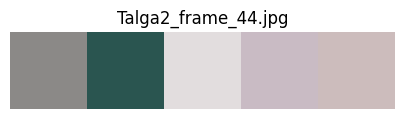

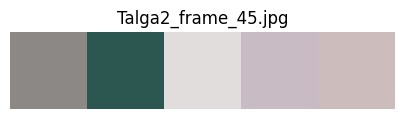

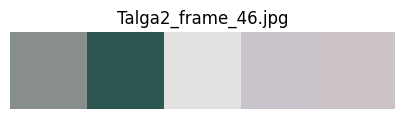

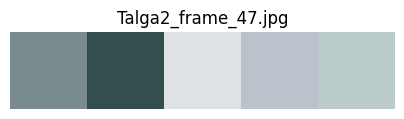

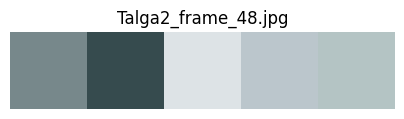

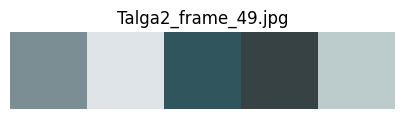

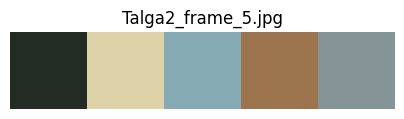

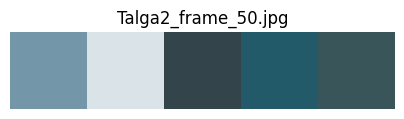

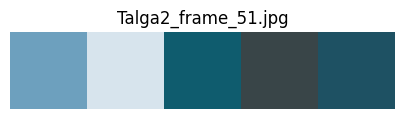

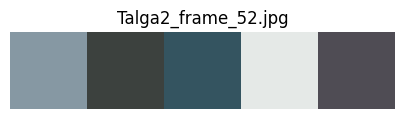

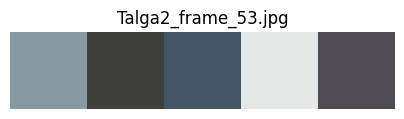

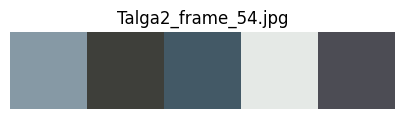

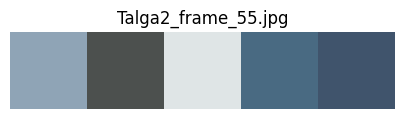

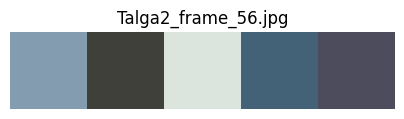

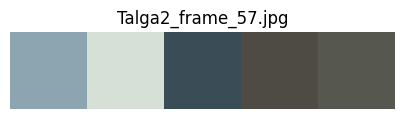

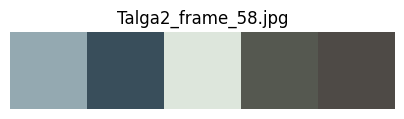

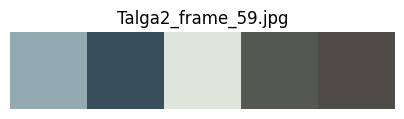

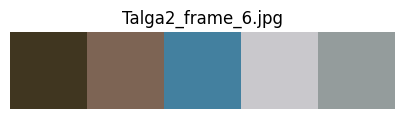

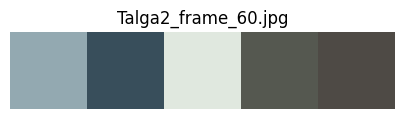

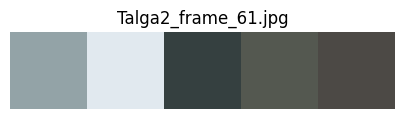

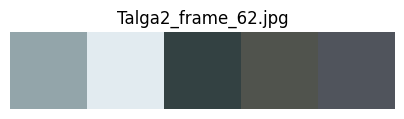

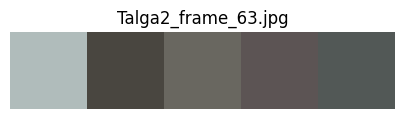

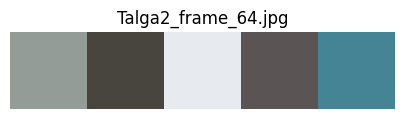

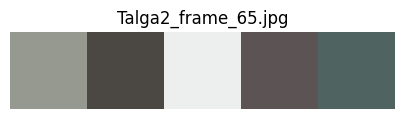

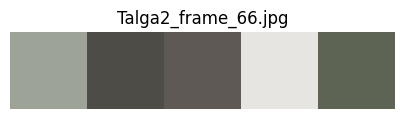

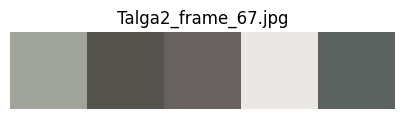

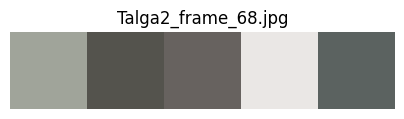

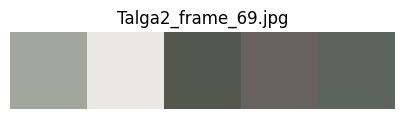

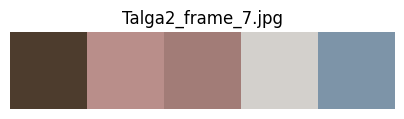

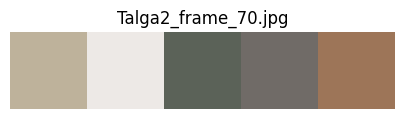

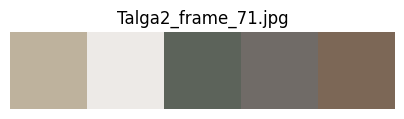

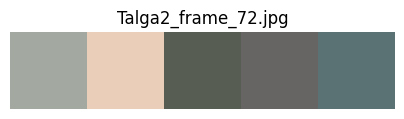

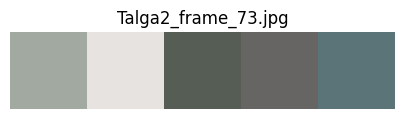

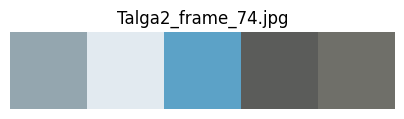

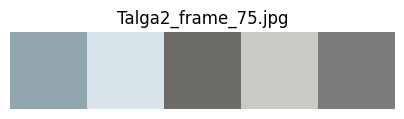

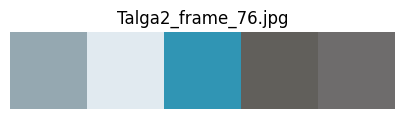

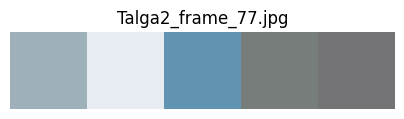

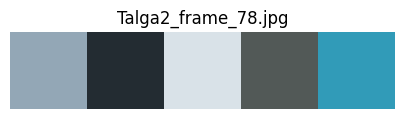

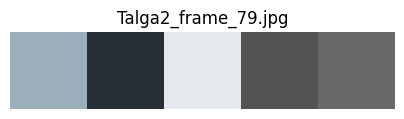

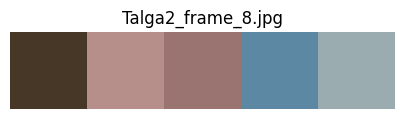

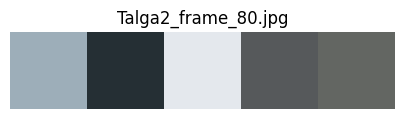

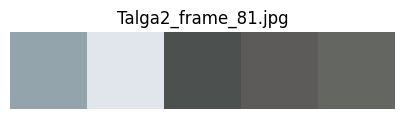

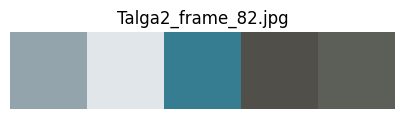

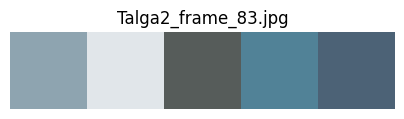

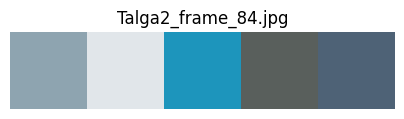

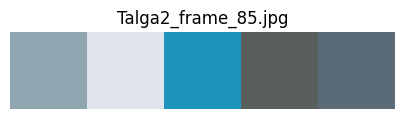

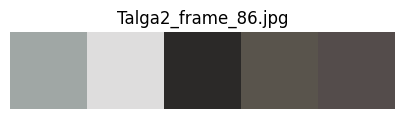

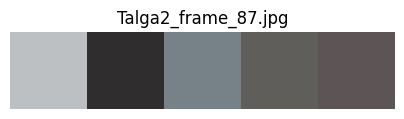

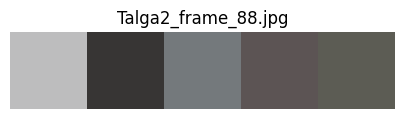

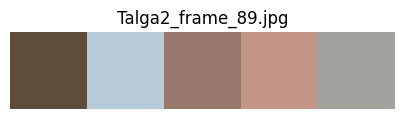

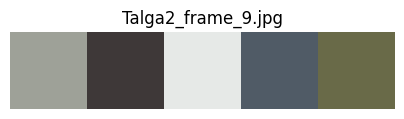

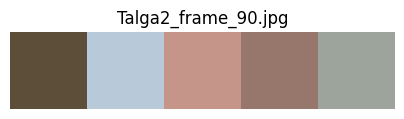

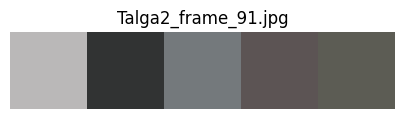

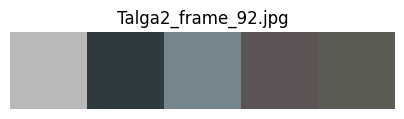

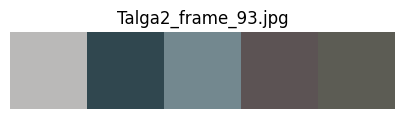

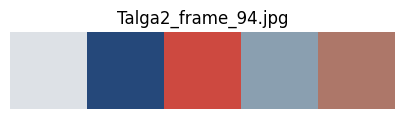

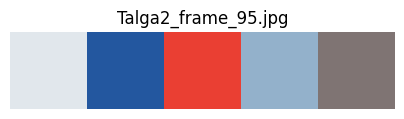

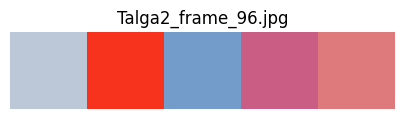

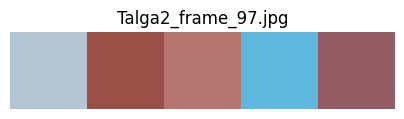

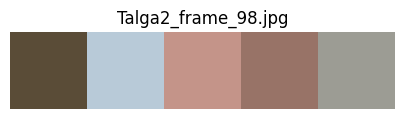

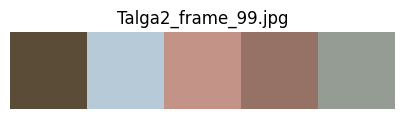


--- Processing LKABVideo.mp4 ---
✅ Saved 54 frames for LKAB1.
✅ CSV saved for LKAB1: LKAB1_colors.csv
🎨 Dominant Colour Counts for LKAB1:
Other: 13 frames
Blue: 32 frames
Green: 9 frames


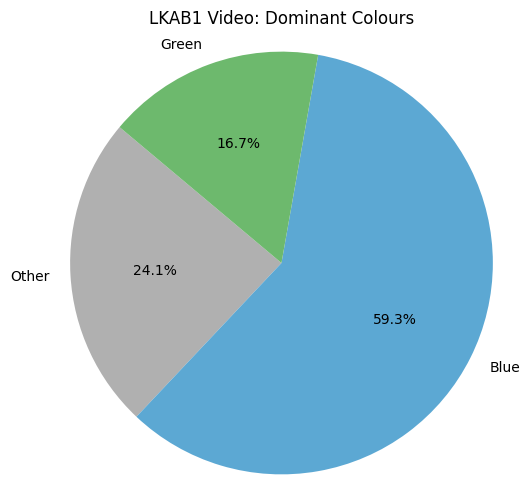

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Pie chart saved and downloaded: LKAB1_piechart.png


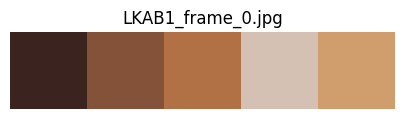

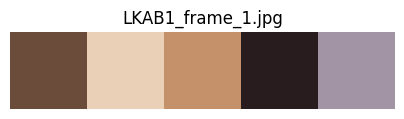

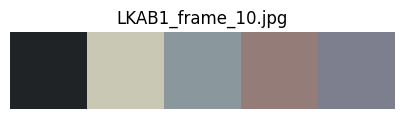

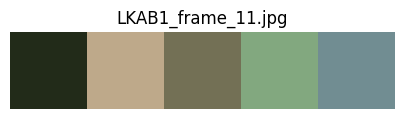

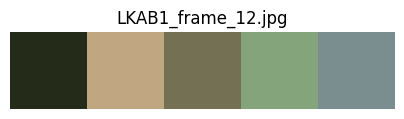

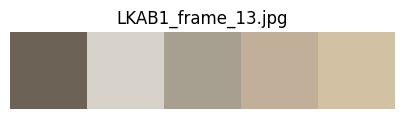

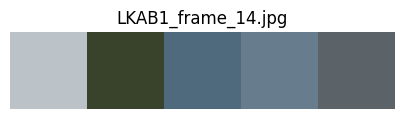

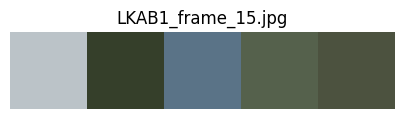

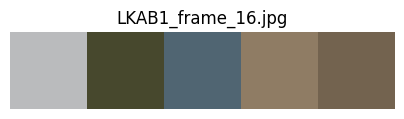

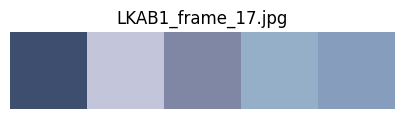

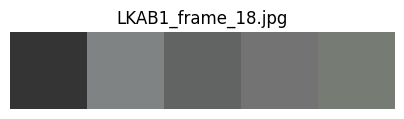

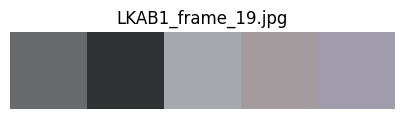

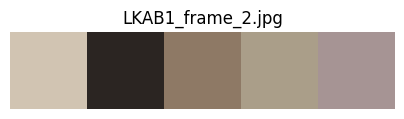

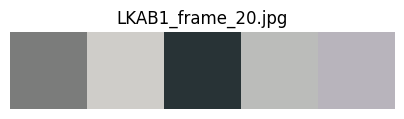

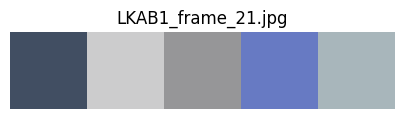

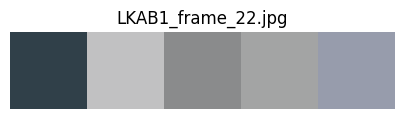

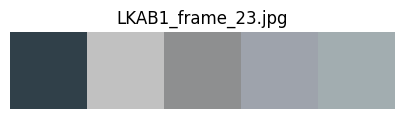

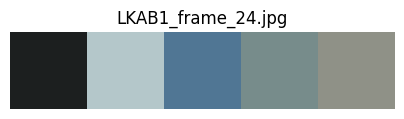

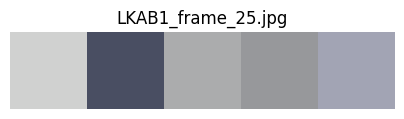

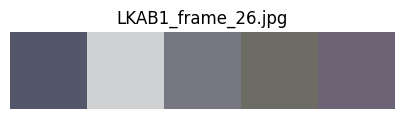

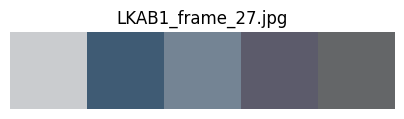

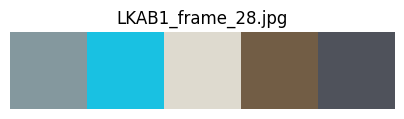

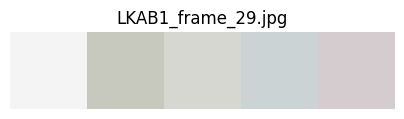

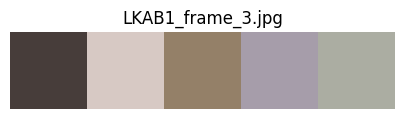

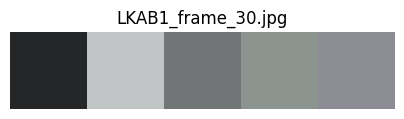

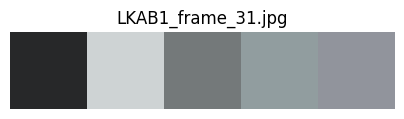

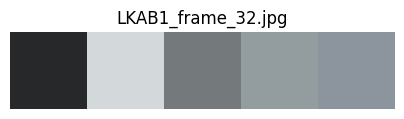

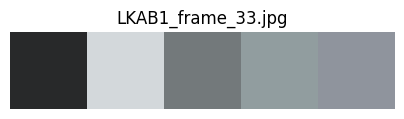

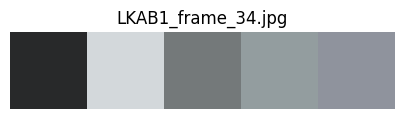

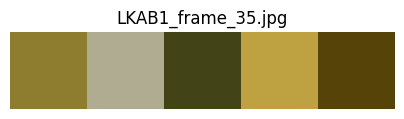

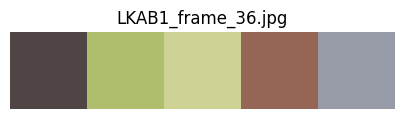

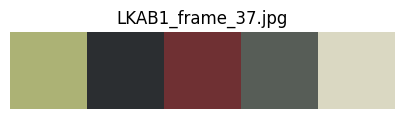

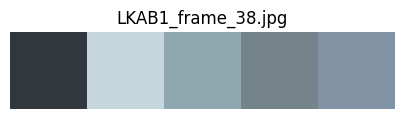

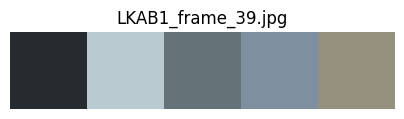

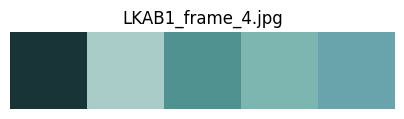

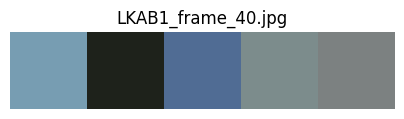

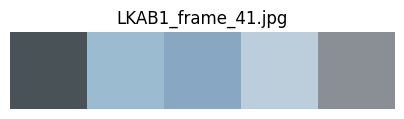

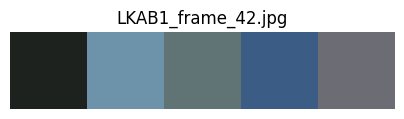

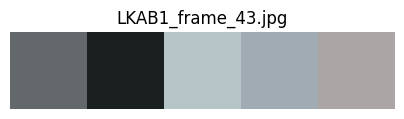

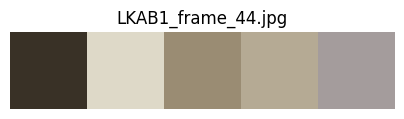

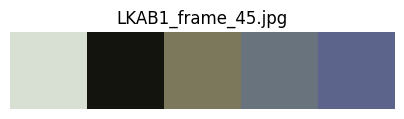

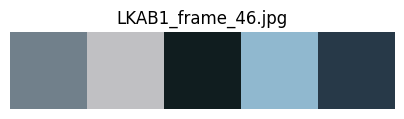

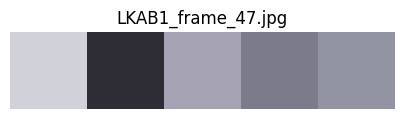

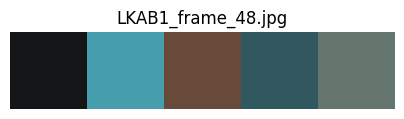

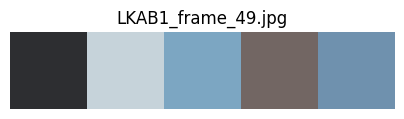

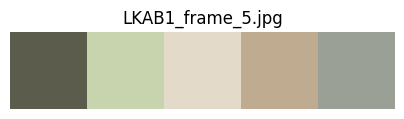

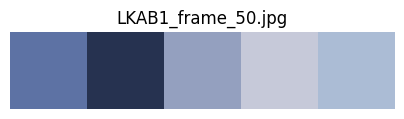

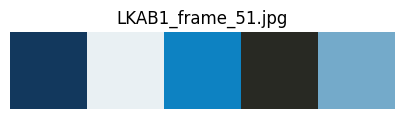

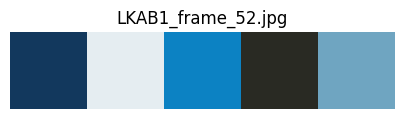

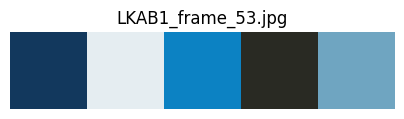

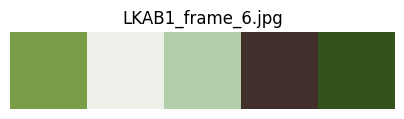

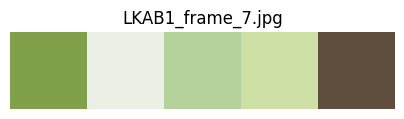

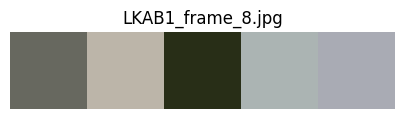

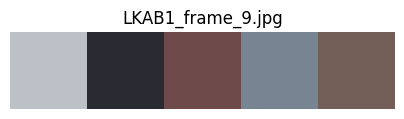


--- Processing LKABVideo2.mp4 ---
✅ Saved 44 frames for LKAB2.
✅ CSV saved for LKAB2: LKAB2_colors.csv
🎨 Dominant Colour Counts for LKAB2:
Blue: 28 frames
Green: 6 frames
Other: 10 frames


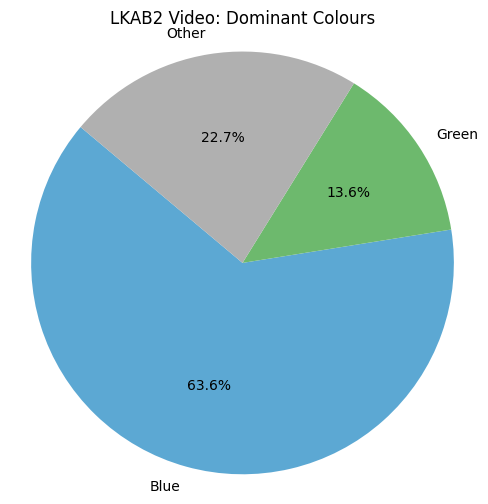

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Pie chart saved and downloaded: LKAB2_piechart.png


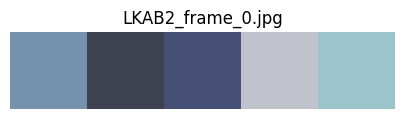

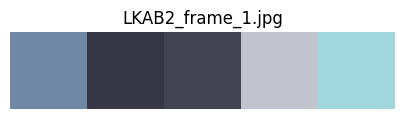

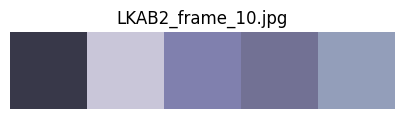

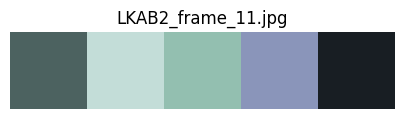

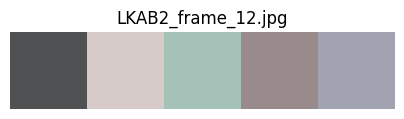

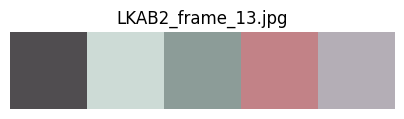

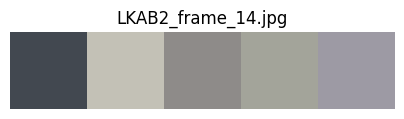

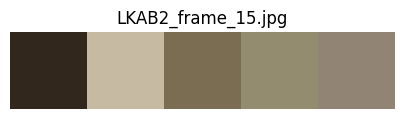

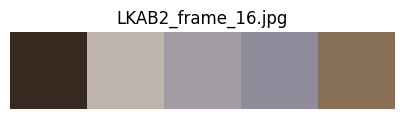

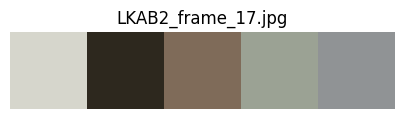

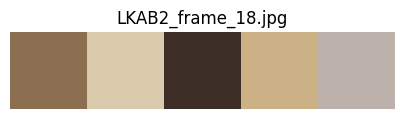

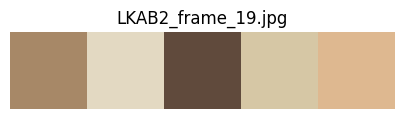

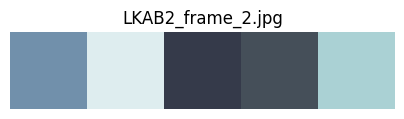

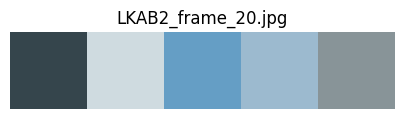

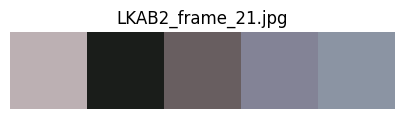

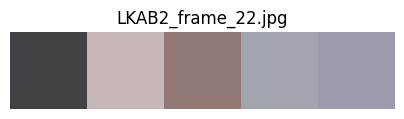

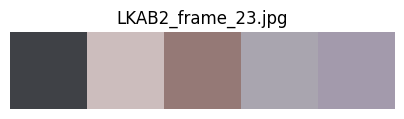

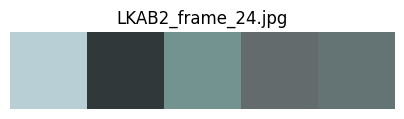

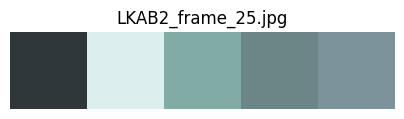

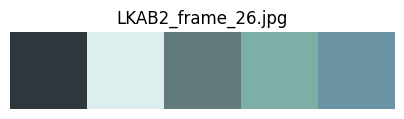

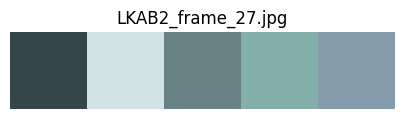

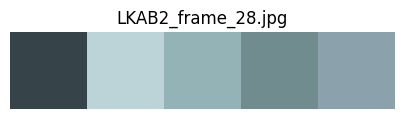

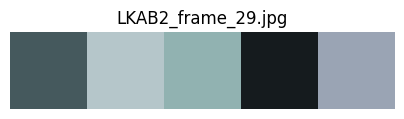

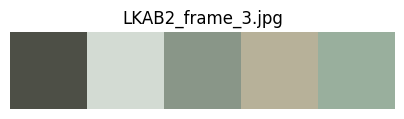

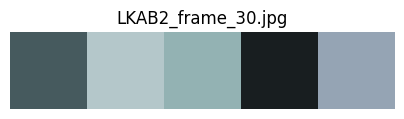

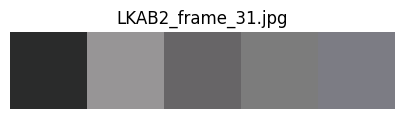

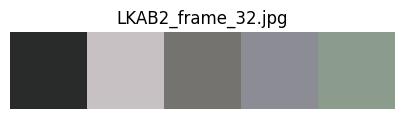

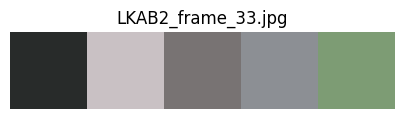

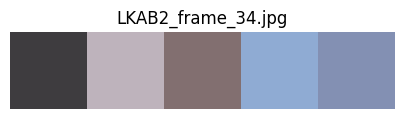

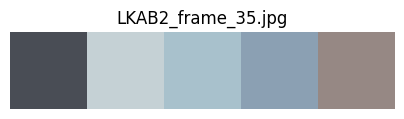

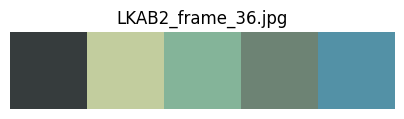

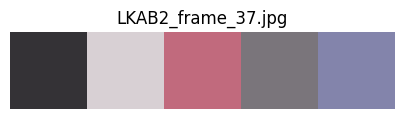

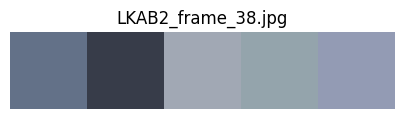

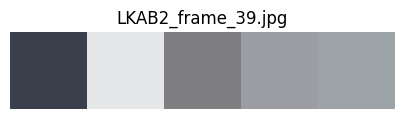

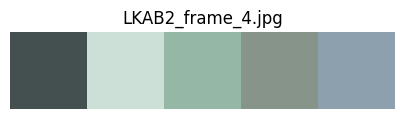

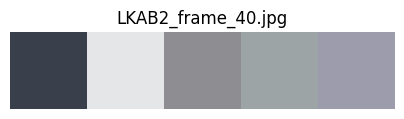

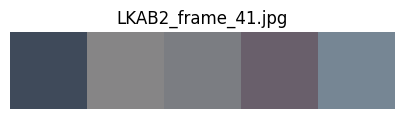

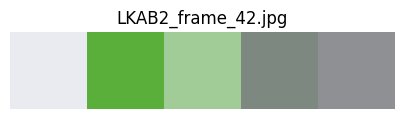

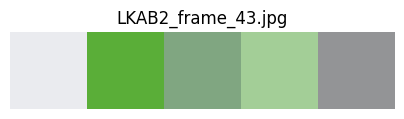

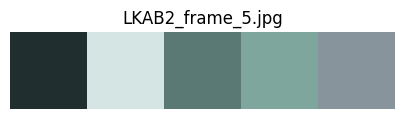

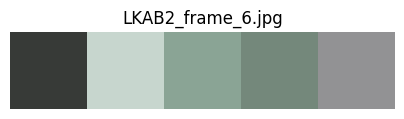

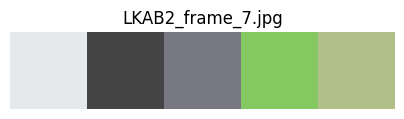

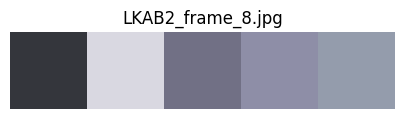

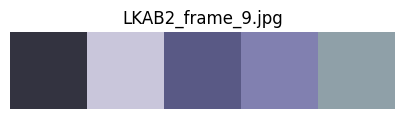


🎓 All videos processed successfully!


In [ ]:
import cv2
import os
import glob
import csv
from colorthief import ColorThief
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files


video_files = [
    ('TalgaVideo.mp4', 'Talga1'),
    ('TalgaVideo2.mp4', 'Talga2'),
    ('LKABVideo.mp4', 'LKAB1'),
    ('LKABVideo2.mp4', 'LKAB2')
]

frame_interval = 60  # Process every 60th frame

# Classify Colour
def classify_color(rgb):
    r, g, b = rgb
    if g > r and g > b:
        return 'Green'
    elif b > r and b > g:
        return 'Blue'
    else:
        return 'Other'

def plot_palette(colors, title):
    plt.figure(figsize=(6, 1))
    plt.imshow([colors])
    plt.axis('off')
    plt.title(title)
    plt.show()

# Process each video
for video_path, prefix in video_files:

    print(f"\n--- Processing {video_path} ---")

    # Create a folder for frames
    frame_folder = f'frames_{prefix}'
    os.makedirs(frame_folder, exist_ok=True)

    # Extract frames
    cap = cv2.VideoCapture(f'/content/drive/MyDrive/Promovid/{video_path}')
    count = 0
    saved = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_interval == 0:
            filename = f'{frame_folder}/{prefix}_frame_{saved}.jpg'
            cv2.imwrite(filename, frame)
            saved += 1
        count += 1
    cap.release()
    print(f"[Saved frames] Saved {saved} frames for {prefix}.")

    # Analyse frames and classify colors
    csv_filename = f'{prefix}_colors.csv'
    labels = []
    with open(csv_filename, mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=['Frame', 'DominantColorLabel'])
        writer.writeheader()

        for frame_file in sorted(glob.glob(f'{frame_folder}/*.jpg')):
            try:
                ct = ColorThief(frame_file)
                color = ct.get_color(quality=1)
                label = classify_color(color)
                labels.append(label)
                writer.writerow({'Frame': os.path.basename(frame_file), 'DominantColorLabel': label})
            except Exception as e:
                print(f"Skipping {frame_file}: {e}")
    print(f"[Saved frames] CSV saved for {prefix}: {csv_filename}")

    # Print dominant colour counts
    label_counts = Counter(labels)
    print(f"[Colour analysis] Dominant Colour Counts for {prefix}:")
    for label, count in label_counts.items():
        print(f"{label}: {count} frames")

    # Generate pie chart
    if label_counts:
        chart_labels = list(label_counts.keys())
        counts = list(label_counts.values())
        color_map = {
            'Green': '#6db96d',
            'Blue': '#5ca8d3',
            'Other': '#b0b0b0'
        }
        colors = [color_map.get(label, '#cccccc') for label in chart_labels]

        plt.figure(figsize=(6, 6))
        plt.pie(counts, labels=chart_labels, colors=colors, autopct='%1.1f%%', startangle=140)
        plt.title(f"{prefix} Video: Dominant Colours")
        plt.axis('equal')

        chart_filename = f'{prefix}_piechart.png'
        plt.savefig(chart_filename, dpi=300)
        plt.show()

        files.download(chart_filename)
        print(f"[Saved frames] Pie chart saved and downloaded: {chart_filename}")
    else:
        print(f"[Warning] No data found for {prefix}.")

    # Plot colour palettes for each frame
    for frame_file in sorted(glob.glob(f'{frame_folder}/*.jpg')):
        try:
            ct = ColorThief(frame_file)
            palette = ct.get_palette(color_count=5)
            palette_rgb = [(r/255, g/255, b/255) for (r, g, b) in palette]
            plot_palette(palette_rgb, os.path.basename(frame_file))
        except Exception as e:
            print(f"Skipping {frame_file} for palette plot: {e}")

print("\n[Process complete] All videos processed successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

--- Processing TalgaVideo.mp4 ---
✅ Saved 32 frames for Talga1.
✅ CSV saved: Talga1_colors.csv


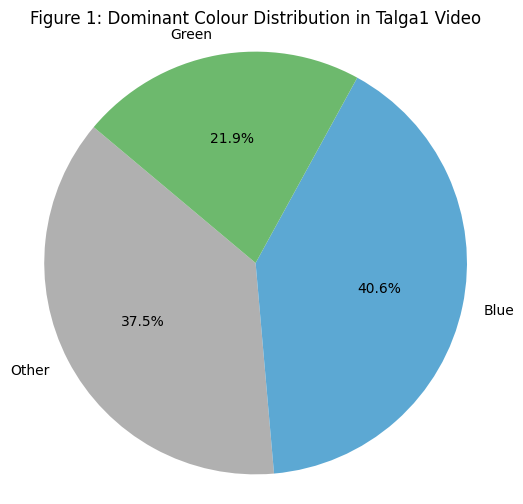

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Pie chart saved and downloaded: Talga1_piechart.png

--- Processing TalgaVideo2.mp4 ---
✅ Saved 140 frames for Talga2.
Skipping frames_Talga2/Talga2_frame_0.jpg: Empty pixels when quantize.
✅ CSV saved: Talga2_colors.csv


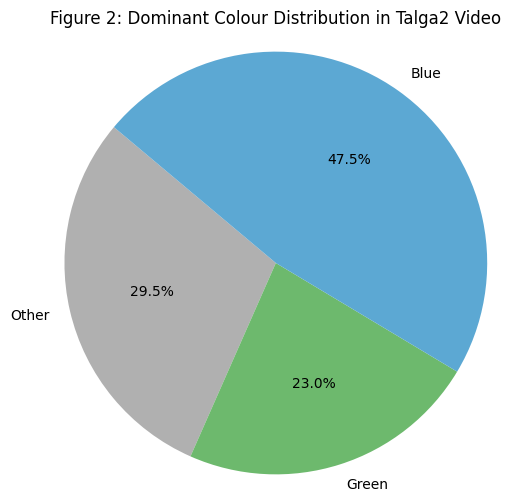

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Pie chart saved and downloaded: Talga2_piechart.png

--- Processing LKABVideo.mp4 ---
✅ Saved 54 frames for LKAB1.
✅ CSV saved: LKAB1_colors.csv


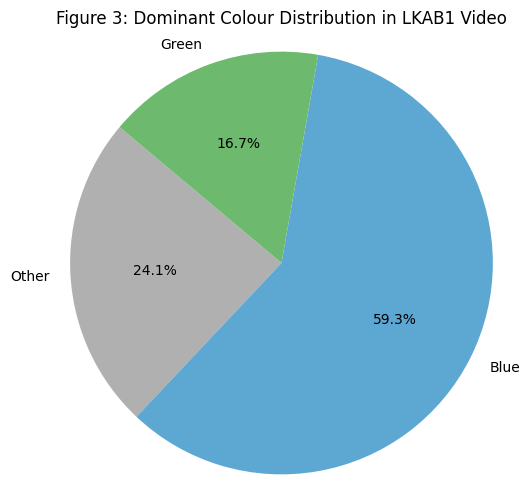

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Pie chart saved and downloaded: LKAB1_piechart.png

--- Processing LKABVideo2.mp4 ---
✅ Saved 44 frames for LKAB2.
✅ CSV saved: LKAB2_colors.csv


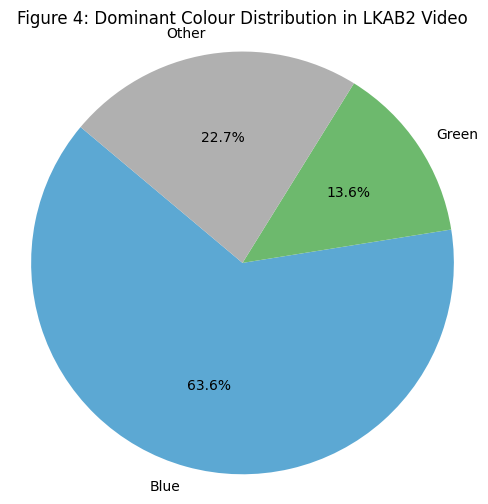

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Pie chart saved and downloaded: LKAB2_piechart.png


In [ ]:
import cv2
import os
import glob
import csv
from colorthief import ColorThief
from collections import Counter
import matplotlib.pyplot as plt
from google.colab import files

# Mount Google Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# Video files (update names if needed)
video_files = [
    ('TalgaVideo.mp4', 'Talga1'),
    ('TalgaVideo2.mp4', 'Talga2'),
    ('LKABVideo.mp4', 'LKAB1'),
    ('LKABVideo2.mp4', 'LKAB2')
]

# Frame extraction interval (every 60th frame)
frame_interval = 60

for video_path, prefix in video_files:

    print(f"\n--- Processing {video_path} ---")

    # Create frame folder
    frame_folder = f'frames_{prefix}'
    os.makedirs(frame_folder, exist_ok=True)

    # Extract frames
    cap = cv2.VideoCapture(f'/content/drive/MyDrive/Promovid/{video_path}')
    count = 0
    saved = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_interval == 0:
            filename = f'{frame_folder}/{prefix}_frame_{saved}.jpg'
            cv2.imwrite(filename, frame)
            saved += 1
        count += 1
    cap.release()
    print(f"[Saved frames] Saved {saved} frames for {prefix}.")

    # Classify colours and save CSV
    csv_filename = f'{prefix}_colors.csv'
    labels = []
    with open(csv_filename, mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=['Frame', 'DominantColorLabel'])
        writer.writeheader()

        for frame_file in sorted(glob.glob(f'{frame_folder}/*.jpg')):
            try:
                ct = ColorThief(frame_file)
                color = ct.get_color(quality=1)
                r, g, b = color
                if g > r and g > b:
                    label = 'Green'
                elif b > r and b > g:
                    label = 'Blue'
                else:
                    label = 'Other'
                labels.append(label)
                writer.writerow({'Frame': os.path.basename(frame_file), 'DominantColorLabel': label})
            except Exception as e:
                print(f"Skipping {frame_file}: {e}")
    print(f"[Saved frames] CSV saved: {csv_filename}")

    # Pie chart
    label_counts = Counter(labels)
    if label_counts:
        chart_labels = list(label_counts.keys())
        counts = list(label_counts.values())
        color_map = {'Green': '#6db96d', 'Blue': '#5ca8d3', 'Other': '#b0b0b0'}
        colors = [color_map.get(label, '#cccccc') for label in chart_labels]

        plt.figure(figsize=(6, 6))
        plt.pie(counts, labels=chart_labels, colors=colors, autopct='%1.1f%%', startangle=140)

        figure_titles = {
            'Talga1': 'Figure 1: Dominant Colour Distribution in Talga1 Video',
            'Talga2': 'Figure 2: Dominant Colour Distribution in Talga2 Video',
            'LKAB1': 'Figure 3: Dominant Colour Distribution in LKAB1 Video',
            'LKAB2': 'Figure 4: Dominant Colour Distribution in LKAB2 Video'
        }
        chart_title = figure_titles.get(prefix, f'Dominant Colour Distribution in {prefix} Video')
        plt.title(chart_title)

        plt.axis('equal')
        chart_filename = f'{prefix}_piechart.png'
        plt.savefig(chart_filename, dpi=300)
        plt.show()

        files.download(chart_filename)
        print(f"[Saved frames] Pie chart saved and downloaded: {chart_filename}")
    else:
        print(f"[Warning] No data found for {prefix}.")